![techCompanies](tech_salaries_analysis.jpg) 

# Introduction
In a world where a cheeseburger no longer costs a quarter, or the even more dejecting reality that less and less of the affluent can afford personal yachts, the value of the dollar has become less and more concurrently.  Less valuable, because the purchasing power of the dollar has diminished, but more valuable because it is more important than ever to squeeze each dollar out of income sources.  In order to combat this reality, and add to the wealth of knowledge surrounding potentially increasing an individual’s income, we are analyzing the tech companies salary dataset.

This dataset consists of information corresponding to individuals with technology centered careers. The data includes general demographic information about the individual, such as education level, years of experience, sex, and race.  For income data, the dataset provides values for metrics such as base salary and total yearly compensation.  Examples of company level information provided include the name of the company and position.  
We will also be merging the dataset with a dataset of current stock market statistics.  This will focus our population on United States based public companies, which in turn will create a more accurate and useful model. This dataset will allow us to analyze variables like the market cap group, a categorical grouping of companies based on the number of outstanding shares multiplied by the stock price.  Other metrics include the number of employees currently employed by the company, the revenue per employee generated, the industry of the company, the sector of the company, and debt growth year over year.

# Objectives
The purpose of our exploration is to find what variables have an impact on tech centered career salaries, how strong the impact of those variables are, and make a prediction as to what salary an individual can potentially expect based on the value of variables that have an impact on salary.  The expectations of this analysis are that variables such as years of experience, market cap group, and revenue per employee have a strong influence on predicting the salary of an individual.

# Stakeholders
As for the stakeholders of our analysis, any individual, current or potential, looking to apply for tech related positions can use our analysis to focus their job search efforts using the metrics that have been found to be most effective in predicting salary to increase their potential salary.  This analysis can be bought or funded by companies similar to LinkedIn, who have a large stake in the analysis and trends of the job market. By gaining a better understanding of the driving factors of salaries, companies can implement initiatives to attract certain markets, ultimately contributing to the overall growth of the industry and the economy at large. 

# Research Questions
The main question we want to answer is what variables can influence the salary of an individual with a technology centered career in the United States.  Finding an answer to this question will give an individual the ability to tailor career decisions in a way to increase the probability of receiving a higher level of compensation.  We expect that the most influential factors include the years of experience an individual has, the size of the company they are working in, and the revenue generated by the company.  This will be analyzed through correlation statistics throughout the data analysis process.

We would like to also answer the question of how strong of a relationship do significant variables have in predicting one’s income within technology centric careers based in the United States.  We expect years of experience to have the largest impact in predicting one’s income.  In order to test this hypothesis, we will be looking at the correlation statistics between years of experience and base salary, as well as the value of the calculated coefficient of years of experience in a multivariate linear regression model.


![processing](data_processing.png) 

In [27]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
# Load the dataset
df = pd.read_csv('tech_companies_salary.csv')
df.shape

(62642, 29)

In [3]:
df.head(3)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
# Number of null values in each column
df.isna().sum()

timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

### Dropping categorical data with null values

>Dropping the data with null values in the gender, education, company, race, tag, and level columns, cleans up the data in order to look at the relationship of these variables on salaries.  

>These values cannot be replaced without adversely affecting other category values.

In [5]:
# Remove rows with null values in subset columns
df = df.dropna(subset=['gender', 'Education', 'company', 'Race', 'tag', 'level'])
df.shape

(21515, 29)

## Function to split the location column into city and state columns.

Locations with more than 2 strings delimited by a comma will be set to null values.  These locations correspond to locations outside of the United States.

Limiting our scope of the data to within the U.S. will increase the accuracy and usefulness of our model, as well as eliminate some outliers in the data.

In [6]:
def split_location(loc):
    location = loc.split(', ')  
    if len(location) == 2:
        city = location[0]
        state = location[1]
    else:
        city = None
        state = None
    return pd.Series([city, state])

# apply function to dataframe
df[['City', 'State']] = df['location'].apply(split_location)
# Remove rows with null values in State column
df = df.dropna(subset='State')

### Verification of Categorical Values

In [7]:
df.State.unique()

array(['CA', 'WA', 'TX', 'AZ', 'NY', 'IL', 'MA', 'NC', 'VA', 'CO', 'FL',
       'WI', 'DC', 'OR', 'MI', 'MN', 'MO', 'PA', 'UT', 'NJ', 'TN', 'LA',
       'GA', 'AR', 'IA', 'OH', 'MD', 'IN', 'MT', 'RI', 'DE', 'OK', 'NV',
       'CT', 'AL', 'SC', 'KS', 'KY', 'WV', 'MS', 'ID', 'NE', 'HI', 'NH',
       'NM', 'ND', 'VT', 'WY', 'ME'], dtype=object)

In [8]:
df.Education.unique()

array(['PhD', "Bachelor's Degree", "Master's Degree", 'Some College',
       'Highschool'], dtype=object)

In [9]:
df.Race.unique()

array(['Asian', 'Two Or More', 'White', 'Hispanic', 'Black'], dtype=object)

In [10]:
df.title.unique()

array(['Software Engineer', 'Software Engineering Manager',
       'Hardware Engineer', 'Product Designer', 'Management Consultant',
       'Product Manager', 'Solution Architect', 'Sales',
       'Technical Program Manager', 'Data Scientist', 'Recruiter',
       'Mechanical Engineer', 'Business Analyst', 'Human Resources',
       'Marketing'], dtype=object)

![stocks](stocks_data.png) 

In [11]:
stocks_df = pd.read_csv('screener-stocks.csv')
stocks_df.head(3)

,Symbol,Company Name,Market Cap,Stock Price,% Change,Industry,PE Ratio,Ent. Value,MC Group,Sector,...,Oper. Margin,Pretax Margin,Profit Margin,R&D / Rev,Avg. Volume,Rel. Volume,RSI,Tax / Revenue,Rev Gr. This Q,Rev Gr. Next Q
0,FLWS,1-800-FLOWERS.COM,6.965698e+08,10.92,1.11%,Specialty Retail,NaN,7.024748e+08,Small-Cap,Consumer Discretionary,...,-2.89%,-3.39%,-3.24%,3.20%,420598.0,77.96%,59.81,-0.15%,-5.95%,-3.19%
1,VCXB,10X Capital Venture Acquisition Corp. III,1.421026e+08,10.77,NaN,Shell Companies,63.35,1.420773e+08,Micro-Cap,Financials,...,NaN,NaN,NaN,NaN,10038.0,0.12%,60.96,NaN,NaN,NaN
2,TXG,10x Genomics,4.316825e+09,36.89,1.77%,Health Information Services,NaN,4.023500e+09,Mid-Cap,Healthcare,...,-42.88%,-40.21%,-41.23%,43.69%,1403080.0,74.62%,34.24,1.02%,7.41%,8.17%


In [12]:
# Reformatting company values to uppercase representation eliminates redundant values in the tech salaries datase
# This also provides a category for a merge of both datasets
df['company'] = df['company'].apply(lambda company: company.upper())
stocks_df['company'] = stocks_df['Company Name'].apply(lambda company: company.upper())

#Removal of the reference to ticker GOOGL, in order to merge data corresponding solely on ticker symbol GOOG.
stocks_df.drop(stocks_df.loc[stocks_df['Symbol']=='GOOGL'].index, inplace=True)

### Editing Company Names
>Here we are reassigning many of the most common company names in the tech salaries dataset.

>These values are being changed to a value that aligns with the company names in the screener stock dataset.

In [13]:
df.loc[ df['company'] == 'GOOGLE', 'company'] = 'ALPHABET'
df.loc[ df['company'] == 'AMAZON', 'company'] = 'AMAZON.COM'
df.loc[ df['company'] == 'FACEBOOK', 'company'] = 'META PLATFORMS'
df.loc[ df['company'] == 'PAYPAL', 'company'] = 'PAYPAL HOLDINGS'
df.loc[ df['company'] == 'HSBC', 'company'] = 'HSBC HOLDINGS'
df.loc[ df['company'] == 'APPLE INC.', 'company'] = 'APPLE'
df.loc[ df['company'] == '2U', 'company'] = '2U, INC.'
df.loc[ df['company'] == 'ABBOTT', 'company'] = 'ABBOTT LABORATORIES'
df.loc[ df['company'] == '8X8', 'company'] = '8X8, INC.'
df.loc[ df['company'] == 'ADP', 'company'] = 'Automatic Data Processing'.upper()
df.loc[ df['company'] == 'AFFIRM', 'company'] = 'AFFIRM HOLDINGS'
df.loc[ df['company'] == 'AMD', 'company'] = 'ADVANCED MICRO DEVICES'
df.loc[ df['company'] == 'INTEL CORPORATION', 'company'] = 'INTEL'
df.loc[ df['company'] == 'IBM', 'company'] = 'INTERNATIONAL BUSINESS MACHINES'
df.loc[ df['company'] == 'CAPITAL ONE', 'company'] = 'CAPITAL ONE FINANCIAL'
df.loc[ df['company'] == 'CISCO', 'company'] = 'CISCO SYSTEMS'
df.loc[ df['company'] == 'JPMORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN CHASE', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'JP MORGAN', 'company'] = 'JPMORGAN CHASE & CO.'
df.loc[ df['company'] == 'UBER', 'company'] = 'UBER TECHNOLOGIES'
df.loc[ df['company'] == 'GOLDMAN SACHS', 'company'] = 'THE GOLDMAN SACHS GROUP'
df.loc[ df['company'] == 'WALMART LABS', 'company'] = 'WALMART'
df.loc[ df['company'] == 'EBAY', 'company'] = 'EBAY INC.'
df.loc[ df['company'] == 'VISA', 'company'] = 'VISA INC.'
df.loc[ df['company'] == 'LYFT', 'company'] = 'LYFT, INC.'
df.loc[ df['company'] == 'SAP', 'company'] = 'SAP SE'
df.loc[ df['company'] == 'DELL', 'company'] = 'DELL TECHNOLOGIES'
df.loc[ df['company'] == 'BOEING', 'company'] = 'THE BOEING COMPANY'
df.loc[ df['company'] == 'GENERAL MOTORS', 'company'] = 'GENERAL MOTORS COMPANY'
df.loc[ df['company'] == 'T-MOBILE', 'company'] = 'T-MOBILE US'

### Initial merge of the data sets

In [14]:
agg_df = pd.merge(df, stocks_df, on="company", how="left")


counts = agg_df['company'].value_counts()
print('Top 10 companies with the most representation: \n')
print(counts.head(10))
print('\nSymbol column nulls: ' + str(agg_df['Symbol'].isna().sum()))

Top 10 companies with the most representation: 

company
AMAZON.COM                         2090
MICROSOFT                          1299
ALPHABET                           1104
META PLATFORMS                      867
APPLE                               569
ORACLE                              309
INTEL                               303
INTERNATIONAL BUSINESS MACHINES     277
CAPITAL ONE FINANCIAL               267
CISCO SYSTEMS                       262
Name: count, dtype: int64

Symbol column nulls: 5093


### Eliminating Remaining Null Values

To eliminate the remaining null values of the symbol column, the entries were researched and a symbol was manually entered into the dataset. 
> Private companies were assigned "PRIVATE"

> Public companies only traded on international exchanges were assigned "INTERNATIONAL"

> Government operated companies were left null

> Remaining ambiguous companies were left null

> Subsidiaries were assigned the ticker symbol corresponding to their respective parent company.

These categories will be dropped from our analysis to focus the scope of our population.

This dataset was then merged on the "Symbol" column to fill in missing values and the dataset was saved as final_aggregated_df.csv.

Column names were updated in order to follow a uniform naming convention.

# Import of Aggregated Dataset

In [354]:
df = pd.read_csv('final_aggregated_df.csv')
df.head(3)

,Unnamed: 0.1,Unnamed: 0,total_yearly_compensation,base_salary,bonus,company,city_id,location,state,city,...,pretax_margin,profit_margin,research_development_over_revenue,average_volume,relative_volume,rsi,tax_over_revenue,revenue_growth_this_quarter,revenue_growth_next_quarter,sex
0,5928,0,400000,210000,45000,ALPHABET,7472,"Sunnyvale, CA",CA,Sunnyvale,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male
1,10063,1,136000,124000,11000,MICROSOFT,11521,"Redmond, WA",WA,Redmond,...,44.47%,36.27%,12.09%,22842031.0,72.63%,56.25,8.20%,17.27%,17.13%,Male
2,5929,2,337000,177000,36000,ALPHABET,7413,"San Bruno, CA",CA,San Bruno,...,27.89%,24.01%,14.78%,22956359.0,72.27%,64.81,3.88%,16.00%,14.35%,Male


In [355]:
df.shape

(16903, 92)

In [356]:
# drop entries with null values in the symbol column removes ambiguous and government operated companies
df = df.dropna(subset='symbol')

# drop entries where symbol is international or private
public_companies = df[(df['symbol'] != 'INTERNATIONAL') & (df['symbol'] != 'PRIVATE')]
public_companies.shape

(14208, 92)

In [357]:
# Subsetting columns to be included in analysis
public_companies = public_companies[['base_salary', 'total_yearly_compensation', 'title', 'years_of_experience', 
                                     'years_at_company', 'education', 'race', 'sex', 'mc_group', 'sector', 
                                     'industry', 'employees', 'revenue_per_employee', 'profit_per_employee',
                                     'cash_over_market_cap', 'debt_growth_year_over_year', 'rsi']]

In [358]:
public_companies.head(3)

,base_salary,total_yearly_compensation,title,years_of_experience,years_at_company,education,race,sex,mc_group,sector,industry,employees,revenue_per_employee,profit_per_employee,cash_over_market_cap,debt_growth_year_over_year,rsi
0,210000,400000,Software Engineer,5,5,PhD,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81
1,124000,136000,Software Engineer,3,2,Bachelor's Degree,Two Or More,Male,Mega-Cap,Technology,Software - Infrastructure,221000.0,1029787.0,373489.0,-0.23%,47.01%,56.25
2,177000,337000,Software Engineer,6,6,Bachelor's Degree,Asian,Male,Mega-Cap,Communication Services,Internet Content & Information,182381.0,1685450.0,404620.0,4.54%,-5.47%,64.81


In [359]:
public_companies.shape

(14208, 17)

![exploratory](exploratory.png) 

# Refining Variables

### In this section, we will be evaluating the variables we are using to predict base salary.  Our goal is to minimize the number of variables and maximize the effectiveness of the remaining variables.

In [360]:
#creating dataset with variables of interest
public_companies = public_companies[['base_salary', 'years_of_experience', 'employees', 'revenue_per_employee',
                                     'education', 'title', 'race', 'sex', 'mc_group', 'sector']]
public_companies.shape

(14208, 10)

>Profit per employee has a collinear relationship with revenue per employee.  Profit per employee is a function of revenue per employee and influenced by external factors like debt taken on by a company for the given year.  This makes it a less reliable predictor, therefore we are dropping it from the variables of interest.

>Years at company has a collinear relationship with years of experience, however years of experience is a more reliable metric due to its holistic nature.  It is for this reason we are dropping years at company from the variables of interest.

>RSI, or the relative strength index is a metric for evaluating if a stock is overbought or oversold.  This is a function of stock price and volume over time.  RSI is a time sensitive metric and with little direct relationship to predicting base salary, therefore we are dropping it from the dataset.

> Cash over market cap is a measure of the cash a company has on hand relative to the market cap of the stock.  The market cap is the number of outstanding shares times the stock price.  Because of the proportional property of this metric we are dropping it from the dataset in lieu of more direct variables like revenue per employee.

> Debt growth year over year is also a time sensitive metric.  Given that our dataset has entries dating back to 2016 and our stock market data is current, we have eliminated this from being a variable of interest.

In [361]:
public_companies.isna().sum()

base_salary              0
years_of_experience      0
employees               11
revenue_per_employee    32
education                0
title                    0
race                     0
sex                      0
mc_group                 0
sector                   0
dtype: int64

In [362]:
public_companies = public_companies.dropna(subset=['employees', 'revenue_per_employee'])

# Data Standardization

In [363]:
columns = ['base_salary', 'years_of_experience', 'employees', 'revenue_per_employee']

means = public_companies[columns].mean()
stds = public_companies[columns].std()

# Z-score standardization
for column in columns:
    public_companies[column + '_std'] = (public_companies[column] - means[column]) / stds[column]

In [364]:
public_companies.head(3)

,base_salary,years_of_experience,employees,revenue_per_employee,education,title,race,sex,mc_group,sector,base_salary_std,years_of_experience_std,employees_std,revenue_per_employee_std
0,210000,5,182381.0,1685450.0,PhD,Software Engineer,Asian,Male,Mega-Cap,Communication Services,1.204493,-0.382571,-0.307317,0.830102
1,124000,3,221000.0,1029787.0,Bachelor's Degree,Software Engineer,Two Or More,Male,Mega-Cap,Technology,-0.539148,-0.707955,-0.236781,0.104547
2,177000,6,182381.0,1685450.0,Bachelor's Degree,Software Engineer,Asian,Male,Mega-Cap,Communication Services,0.535421,-0.219880,-0.307317,0.830102


In [365]:
public_companies.describe().round(2)

,base_salary,years_of_experience,employees,revenue_per_employee,base_salary_std,years_of_experience_std,employees_std,revenue_per_employee_std
count,14176.00,14176.00,14176.0,14176.00,14176.00,14176.00,14176.00,14176.00
mean,150591.92,7.35,350641.0,935310.56,-0.00,-0.00,0.00,-0.00
std,49322.07,6.15,547513.5,903671.35,1.00,1.00,1.00,1.00
min,10000.00,0.00,7.0,18387.00,-2.85,-1.20,-0.64,-1.01
25%,120000.00,3.00,29945.0,376908.00,-0.62,-0.71,-0.59,-0.62
50%,146000.00,6.00,124800.0,674122.00,-0.09,-0.22,-0.41,-0.29
75%,171000.00,10.00,221000.0,1226349.00,0.41,0.43,-0.24,0.32
max,893000.00,45.00,2100000.0,25719571.00,15.05,6.13,3.20,27.43


# Numerical Data: Summary Statistics and Visualizations

In [366]:
#Function to remove outliers based on IQR
def removeOutliersIQR(df, column):

    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    
    iqr = q3 - q1
    upperThreshold = q3 + (1.5 * iqr)
    lowerThreshold = q1 - (1.5 * iqr)
    
    df = df[(df[column] <= upperThreshold) & (df[column] >= lowerThreshold)]    
    
    return df

## Quantitative Individual Level Data

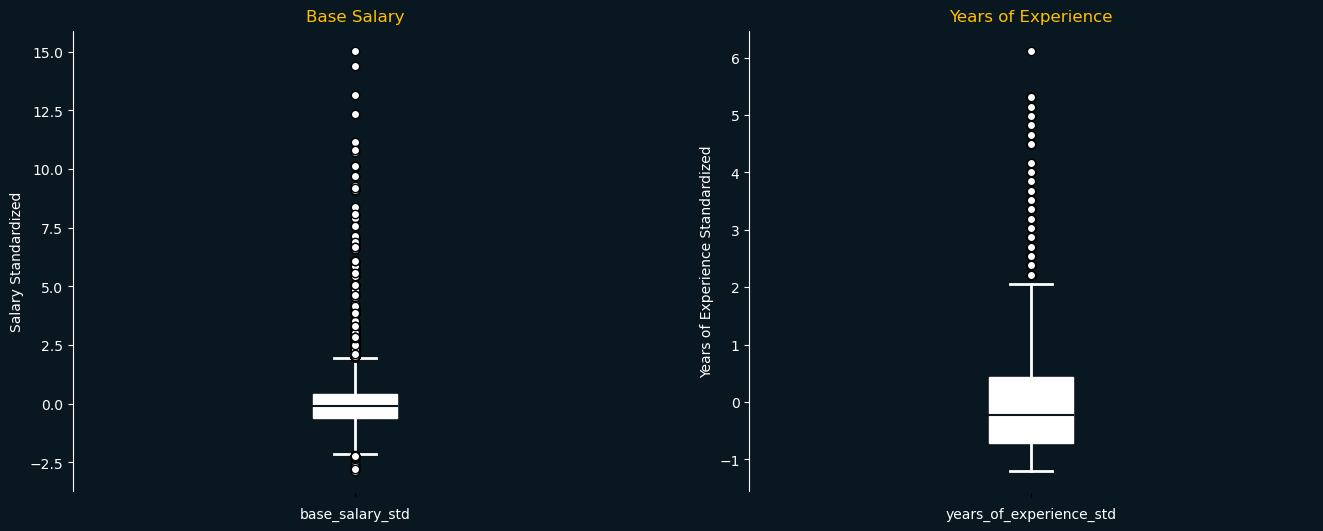

In [367]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(16)

public_companies.boxplot(column='base_salary_std', patch_artist = True,
                         boxprops = dict(facecolor = "white", color='white'),
                         medianprops = dict(color = "#091720", linewidth = 1.5),
                         whiskerprops = dict(color = "white", linewidth = 2),
                         capprops = dict(color = "white", linewidth = 2),
                         flierprops = dict(marker = 'o', markerfacecolor = "white"), ax=ax[0])
ax[0].set_title('Base Salary')
ax[0].spines['bottom'].set_color('#091720')
ax[0].spines['top'].set_color('#091720') 
ax[0].spines['right'].set_color('#091720')
ax[0].spines['left'].set_color('white')
fig.patch.set_facecolor('#091720')
ax[0].set_facecolor('#091720')
ax[0].set_title('Base Salary', color='#FFC000')
ax[0].set_xlabel("base_salary_std", color='white')
ax[0].set_ylabel("Salary Standardized", color='white')
ax[0].tick_params(axis='y', colors='white')
ax[0].grid(visible=False)

public_companies.boxplot(column='years_of_experience_std', patch_artist = True,
                         boxprops = dict(facecolor = "white", color='white'),
                         medianprops = dict(color = "#091720", linewidth = 1.5),
                         whiskerprops = dict(color = "white", linewidth = 2),
                         capprops = dict(color = "white", linewidth = 2),
                         flierprops = dict(marker = 'o', markerfacecolor = "white"), ax=ax[1])
ax[1].set_title('Years of Experience', color='#FFC000')
ax[1].spines['bottom'].set_color('#091720')
ax[1].spines['top'].set_color('#091720') 
ax[1].spines['right'].set_color('#091720')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('#091720')
ax[1].set_xlabel("years_of_experience_std", color='white')
ax[1].set_ylabel("Years of Experience Standardized", color='white')
ax[1].tick_params(axis='y', colors='white')
ax[1].grid(visible=False)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

plt.show()

In [368]:
# remove outliers
public_companies = removeOutliersIQR(public_companies, 'base_salary_std')
public_companies = removeOutliersIQR(public_companies, 'years_of_experience_std')

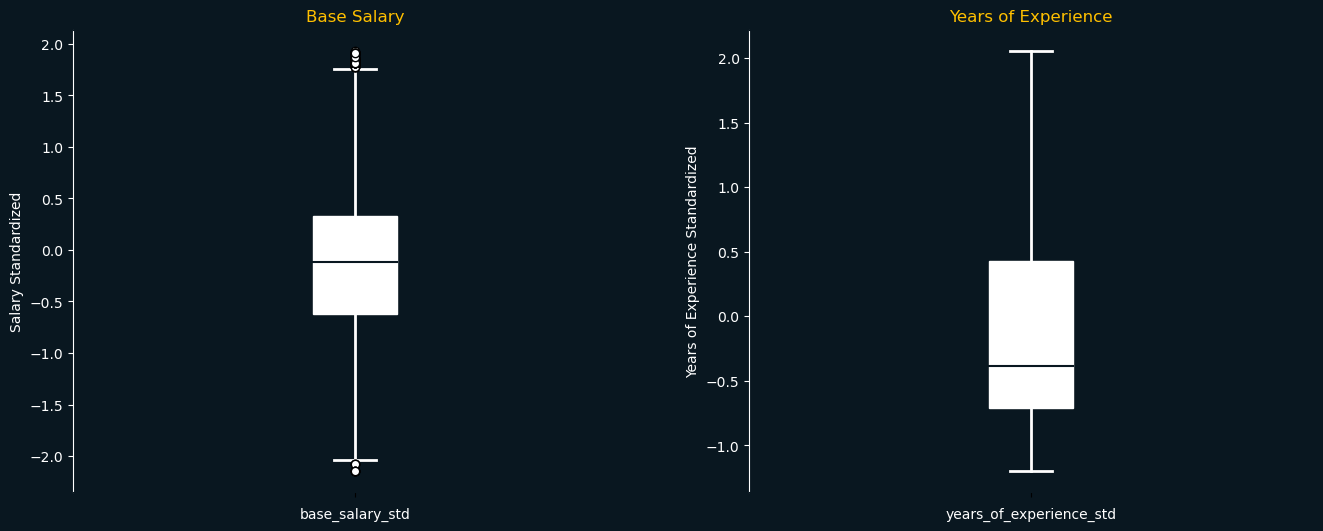

In [369]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(16)

public_companies.boxplot(column='base_salary_std', patch_artist = True,
                         boxprops = dict(facecolor = "white", color='white'),
                         medianprops = dict(color = "#091720", linewidth = 1.5),
                         whiskerprops = dict(color = "white", linewidth = 2),
                         capprops = dict(color = "white", linewidth = 2),
                         flierprops = dict(marker = 'o', markerfacecolor = "white"), ax=ax[0])
ax[0].set_title('Base Salary')
ax[0].spines['bottom'].set_color('#091720')
ax[0].spines['top'].set_color('#091720') 
ax[0].spines['right'].set_color('#091720')
ax[0].spines['left'].set_color('white')
fig.patch.set_facecolor('#091720')
ax[0].set_facecolor('#091720')
ax[0].set_title('Base Salary', color='#FFC000')
ax[0].set_xlabel("base_salary_std", color='white')
ax[0].set_ylabel("Salary Standardized", color='white')
ax[0].tick_params(axis='y', colors='white')
ax[0].grid(visible=False)

public_companies.boxplot(column='years_of_experience_std', patch_artist = True,
                         boxprops = dict(facecolor = "white", color='white'),
                         medianprops = dict(color = "#091720", linewidth = 1.5),
                         whiskerprops = dict(color = "white", linewidth = 2),
                         capprops = dict(color = "white", linewidth = 2),
                         flierprops = dict(marker = 'o', markerfacecolor = "white"), ax=ax[1])
ax[1].set_title('Years of Experience', color='#FFC000')
ax[1].spines['bottom'].set_color('#091720')
ax[1].spines['top'].set_color('#091720') 
ax[1].spines['right'].set_color('#091720')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('#091720')
ax[1].set_xlabel("years_of_experience_std", color='white')
ax[1].set_ylabel("Years of Experience Standardized", color='white')
ax[1].tick_params(axis='y', colors='white')
ax[1].grid(visible=False)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

plt.show()

In [370]:
public_companies[['base_salary_std', 'years_of_experience_std']].describe()

,base_salary_std,years_of_experience_std
count,13383.000000,13383.000000
mean,-0.114244,-0.122651
std,0.730099,0.834791
min,-2.140865,-1.196031
25%,-0.620248,-0.707955
50%,-0.113376,-0.382571
75%,0.332672,0.430888
max,1.934389,2.057806


## Quantitative Company Level Data

In [371]:
public_companies.dropna(subset=['employees_std', 'revenue_per_employee_std'], inplace=True)

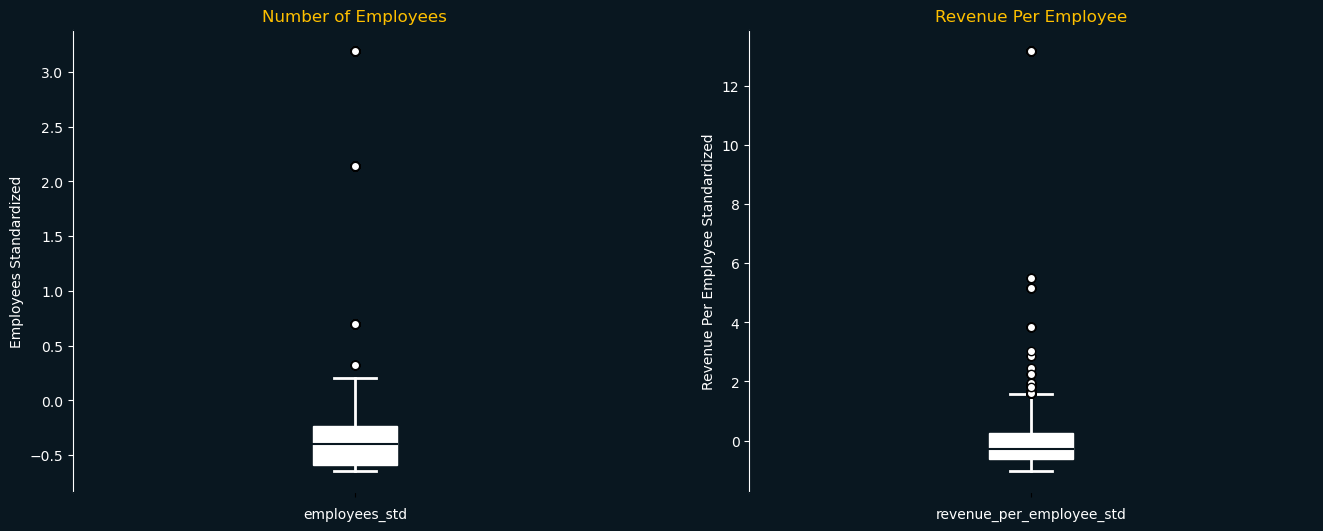

In [372]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(16)

public_companies.boxplot(column='employees_std', patch_artist = True,
                         boxprops = dict(facecolor = "white", color='white'),
                         medianprops = dict(color = "#091720", linewidth = 1.5),
                         whiskerprops = dict(color = "white", linewidth = 2),
                         capprops = dict(color = "white", linewidth = 2),
                         flierprops = dict(marker = 'o', markerfacecolor = "white"), ax=ax[0])
ax[0].spines['bottom'].set_color('#091720')
ax[0].spines['top'].set_color('#091720') 
ax[0].spines['right'].set_color('#091720')
ax[0].spines['left'].set_color('white')
fig.patch.set_facecolor('#091720')
ax[0].set_facecolor('#091720')
ax[0].set_title('Number of Employees', color='#FFC000')
ax[0].set_xlabel("employees_std", color='white')
ax[0].set_ylabel("Employees Standardized", color='white')
ax[0].tick_params(axis='y', colors='white')
ax[0].grid(visible=False)

public_companies.boxplot(column='revenue_per_employee_std', patch_artist = True,
                         boxprops = dict(facecolor = "white", color='white'),
                         medianprops = dict(color = "#091720", linewidth = 1.5),
                         whiskerprops = dict(color = "white", linewidth = 2),
                         capprops = dict(color = "white", linewidth = 2),
                         flierprops = dict(marker = 'o', markerfacecolor = "white"), ax=ax[1])
ax[1].set_title('Revenue Per Employee', color='#FFC000')
ax[1].spines['bottom'].set_color('#091720')
ax[1].spines['top'].set_color('#091720') 
ax[1].spines['right'].set_color('#091720')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('#091720')
ax[1].set_xlabel("revenue_per_employee_std", color='white')
ax[1].set_ylabel("Revenue Per Employee Standardized", color='white')
ax[1].tick_params(axis='y', colors='white')
ax[1].grid(visible=False)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

plt.show()

In [373]:
#remove outliers
public_companies = removeOutliersIQR(public_companies, 'employees_std')
public_companies = removeOutliersIQR(public_companies, 'revenue_per_employee_std')

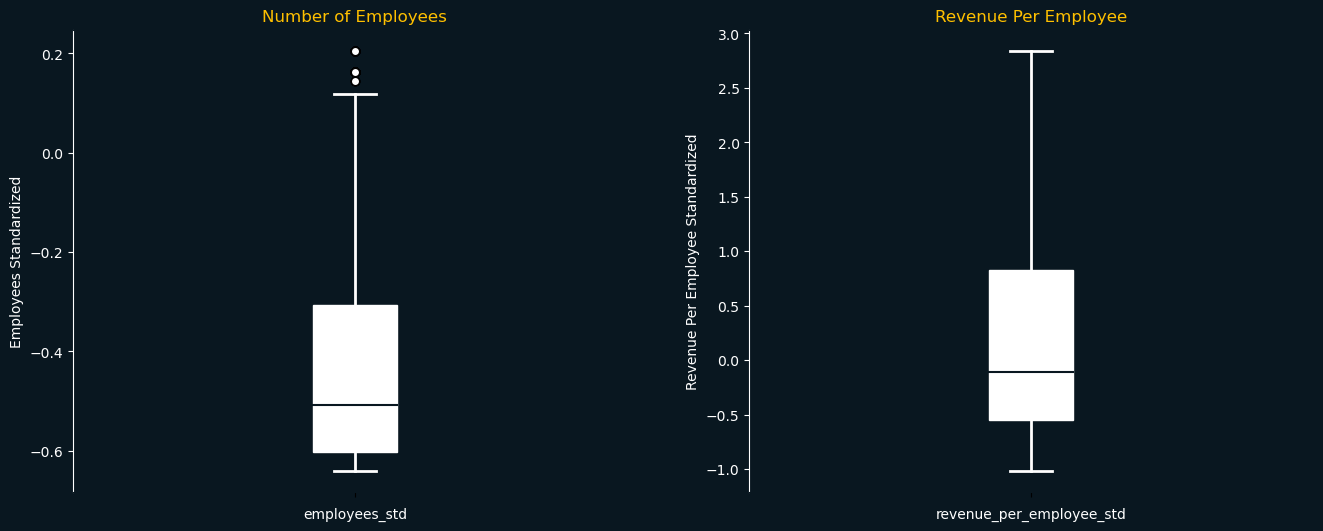

In [374]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(16)

public_companies.boxplot(column='employees_std', patch_artist = True,
                         boxprops = dict(facecolor = "white", color='white'),
                         medianprops = dict(color = "#091720", linewidth = 1.5),
                         whiskerprops = dict(color = "white", linewidth = 2),
                         capprops = dict(color = "white", linewidth = 2),
                         flierprops = dict(marker = 'o', markerfacecolor = "white"), ax=ax[0])
ax[0].spines['bottom'].set_color('#091720')
ax[0].spines['top'].set_color('#091720') 
ax[0].spines['right'].set_color('#091720')
ax[0].spines['left'].set_color('white')
fig.patch.set_facecolor('#091720')
ax[0].set_facecolor('#091720')
ax[0].set_title('Number of Employees', color='#FFC000')
ax[0].set_xlabel("employees_std", color='white')
ax[0].set_ylabel("Employees Standardized", color='white')
ax[0].tick_params(axis='y', colors='white')
ax[0].grid(visible=False)

public_companies.boxplot(column='revenue_per_employee_std', patch_artist = True,
                         boxprops = dict(facecolor = "white", color='white'),
                         medianprops = dict(color = "#091720", linewidth = 1.5),
                         whiskerprops = dict(color = "white", linewidth = 2),
                         capprops = dict(color = "white", linewidth = 2),
                         flierprops = dict(marker = 'o', markerfacecolor = "white"), ax=ax[1])
ax[1].set_title('Revenue Per Employee', color='#FFC000')
ax[1].spines['bottom'].set_color('#091720')
ax[1].spines['top'].set_color('#091720') 
ax[1].spines['right'].set_color('#091720')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('#091720')
ax[1].set_xlabel("revenue_per_employee_std", color='white')
ax[1].set_ylabel("Revenue Per Employee Standardized", color='white')
ax[1].tick_params(axis='y', colors='white')
ax[1].grid(visible=False)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

plt.show()

In [375]:
public_companies[['employees_std', 'revenue_per_employee_std']].describe()

,employees_std,revenue_per_employee_std
count,10961.000000,10961.000000
mean,-0.440944,0.072302
std,0.171683,0.720021
min,-0.640276,-1.014665
25%,-0.603348,-0.554174
50%,-0.507675,-0.112617
75%,-0.307317,0.830102
max,0.205400,2.843103


# Categorical Data

In [376]:
public_companies[['education', 'race', 'sex', 'title', 'mc_group', 'sector']].describe()

,education,race,sex,title,mc_group,sector
count,10961,10961,10961,10961,10961,10961
unique,5,5,3,15,6,11
top,Bachelor's Degree,Asian,Male,Software Engineer,Mega-Cap,Technology
freq,5293,5728,8625,6918,5587,5714


In [377]:
public_companies.groupby('mc_group')['base_salary_std'].count()

mc_group
Large-Cap    4306
Mega-Cap     5587
Micro-Cap      27
Mid-Cap       802
Nano-Cap       22
Small-Cap     217
Name: base_salary_std, dtype: int64

In [378]:
public_companies.groupby('sector')['base_salary_std'].count()

sector
Communication Services    2508
Consumer Discretionary     790
Consumer Staples            79
Energy                       8
Financials                1219
Healthcare                 185
Industrials                415
Materials                    5
Real Estate                 32
Technology                5714
Utilities                    6
Name: base_salary_std, dtype: int64

In [379]:
# removing data entries belonging to categorwith less than 30 observations
public_companies = public_companies.drop(public_companies[public_companies['mc_group'] == 'Micro-Cap'].index)
public_companies = public_companies.drop(public_companies[public_companies['mc_group'] == 'Nano-Cap'].index)

public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Energy'].index)
public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Materials'].index)
public_companies = public_companies.drop(public_companies[public_companies['sector'] == 'Utilities'].index)

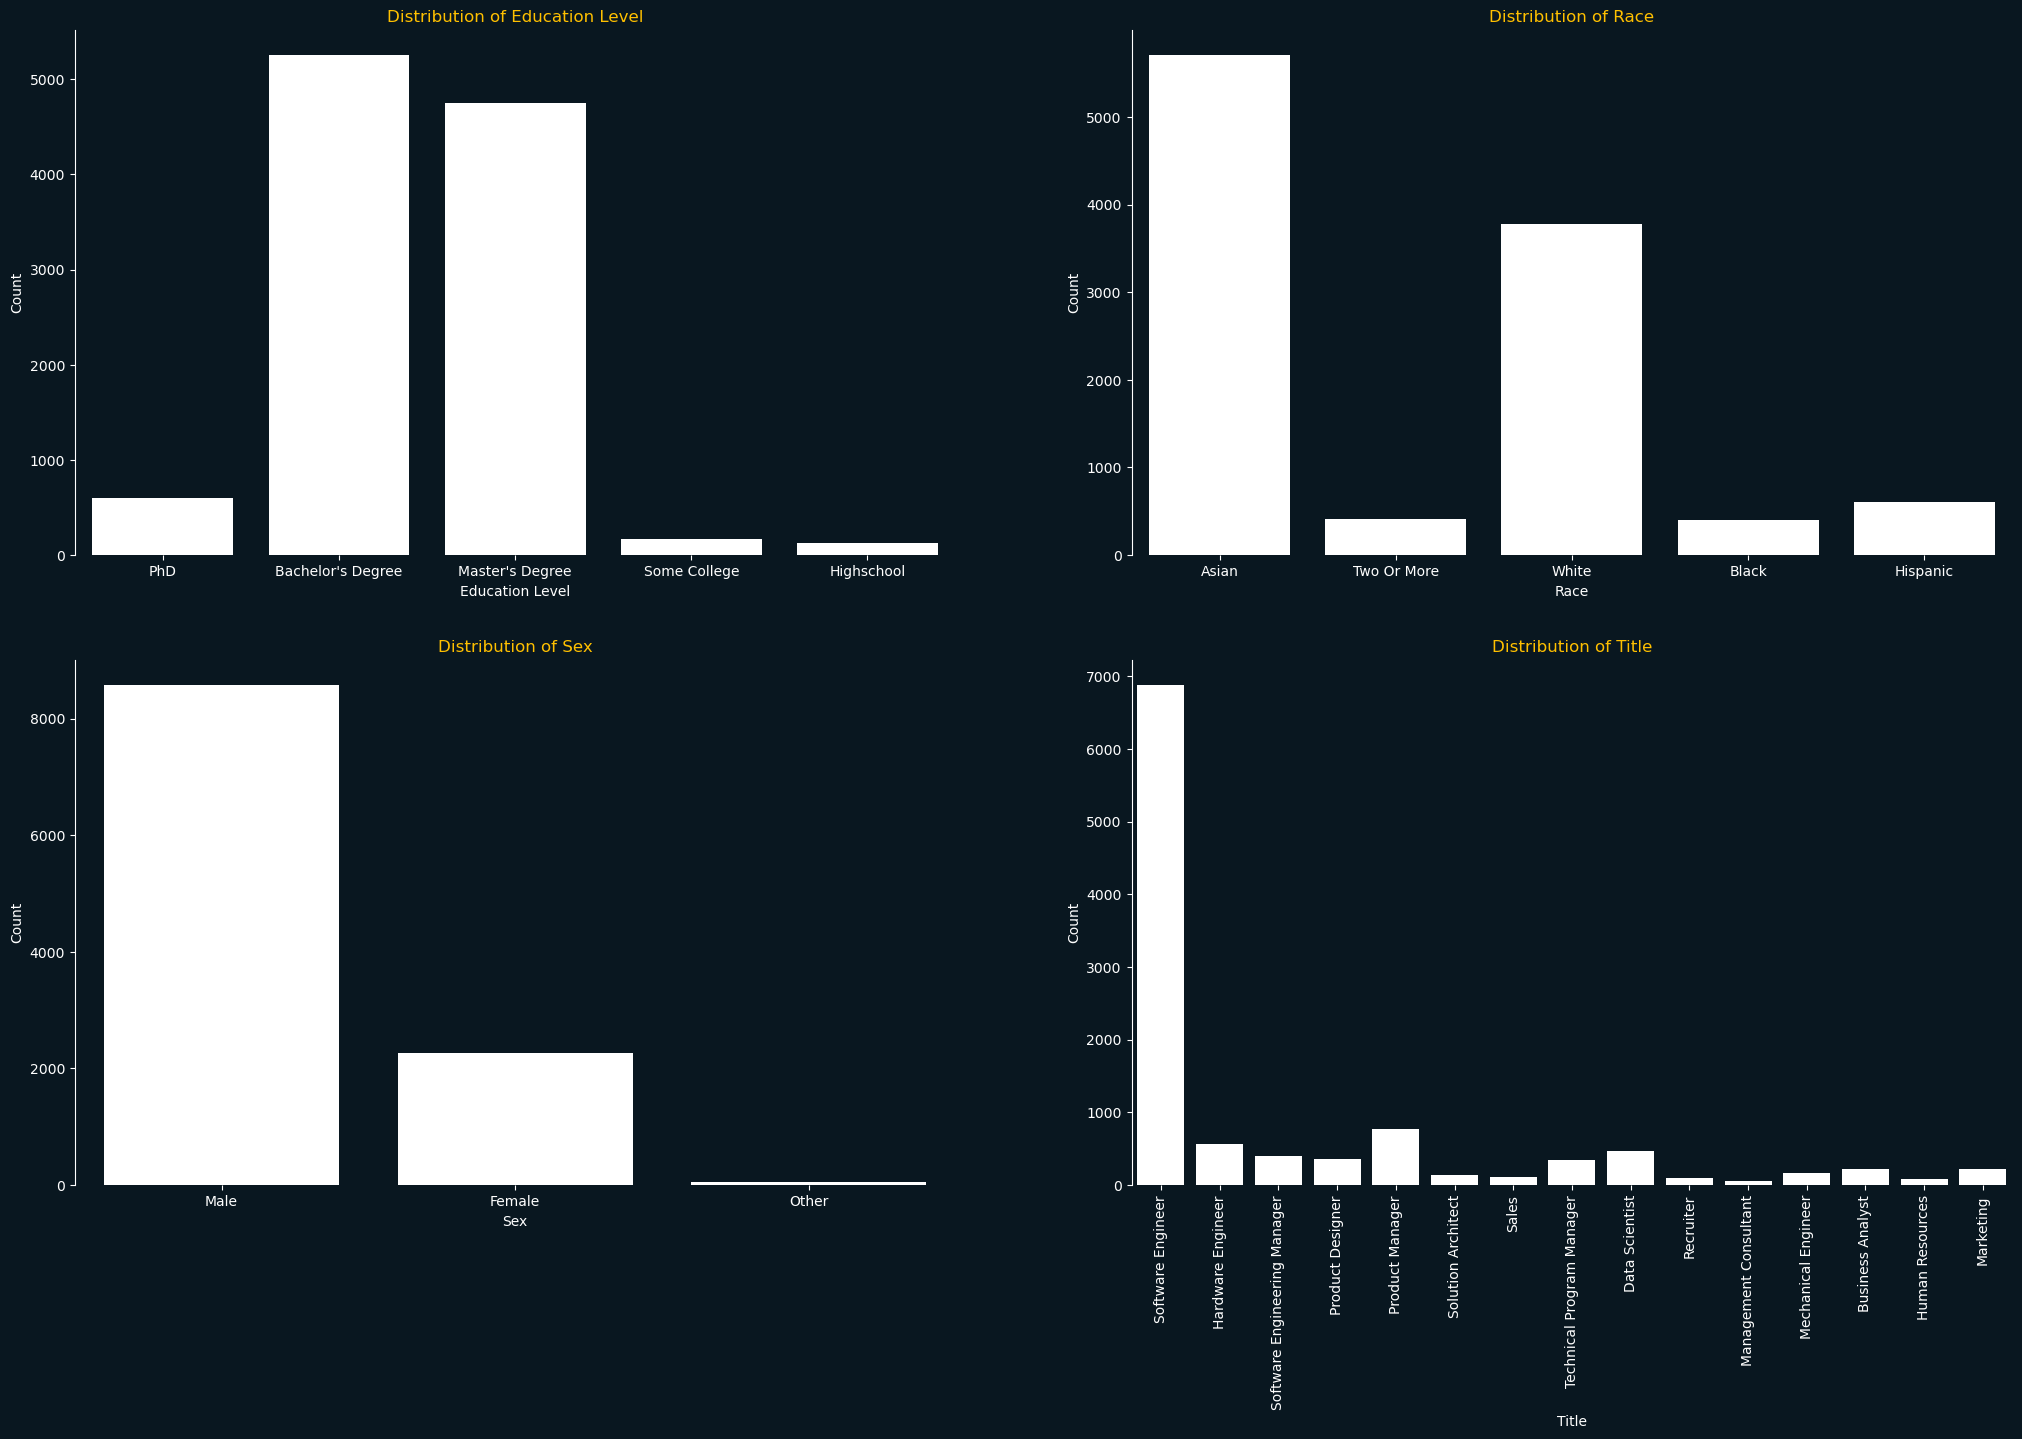

In [380]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(25)
fig.patch.set_facecolor('#091720')

sns.countplot(x='education', data=public_companies, color='white', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Education Level', color='#FFC000')
ax[0, 0].set_ylabel('Count', color='white')
ax[0, 0].set_xlabel('Education Level', color='white')
ax[0, 0].set_facecolor('#091720')
ax[0, 0].tick_params(axis='y', colors='white')
ax[0, 0].tick_params(axis='x', colors='white')


ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['bottom'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['left'].set_color('white')

sns.countplot(x='race', data=public_companies, color='white', ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Race', color='#FFC000')
ax[0, 1].set_ylabel('Count', color='white')
ax[0, 1].set_xlabel('Race', color='white')
ax[0, 1].set_facecolor('#091720')
ax[0, 1].tick_params(axis='y', colors='white')
ax[0, 1].tick_params(axis='x', colors='white')


ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['bottom'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['left'].set_color('white')

sns.countplot(x='sex', data=public_companies, color='white', ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Sex', color='#FFC000')
ax[1, 0].set_ylabel('Count', color='white')
ax[1, 0].set_xlabel('Sex', color='white')
ax[1, 0].set_facecolor('#091720')
ax[1, 0].tick_params(axis='y', colors='white')
ax[1, 0].tick_params(axis='x', colors='white')


ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['bottom'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['left'].set_color('white')

sns.countplot(x='title', data=public_companies, color='white', ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Title', color='#FFC000')
ax[1, 1].set_ylabel('Count', color='white')
ax[1, 1].set_xlabel('Title', color='white')
ax[1, 1].set_facecolor('#091720')
ax[1, 1].tick_params(axis='y', colors='white')
ax[1, 1].tick_params(axis='x', colors='white')


ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['bottom'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['left'].set_color('white')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)


plt.show()

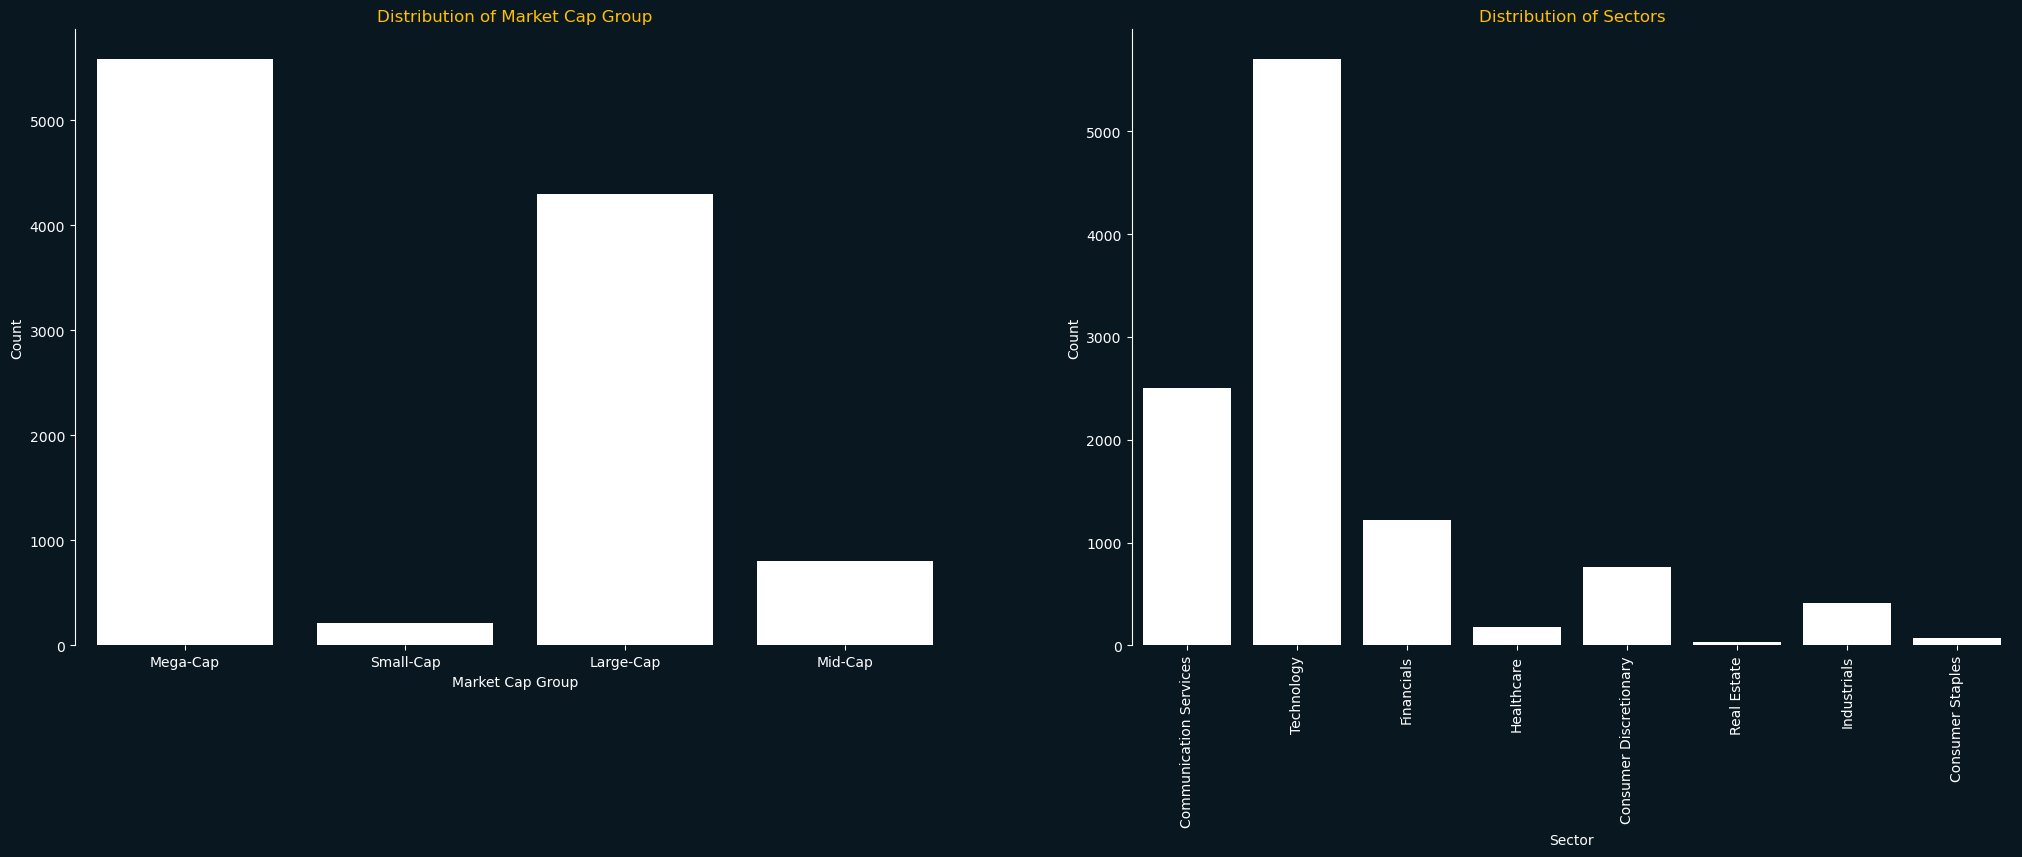

In [381]:
fig, ax = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)
fig.patch.set_facecolor('#091720')

sns.countplot(x='mc_group', data=public_companies, color='white', ax=ax[0])
ax[0].set_title('Distribution of Market Cap Group', color='#FFC000')
ax[0].set_ylabel('Count', color='white')
ax[0].set_xlabel('Market Cap Group', color='white')
ax[0].set_facecolor('#091720')
ax[0].tick_params(axis='y', colors='white')
ax[0].tick_params(axis='x', colors='white')


ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_color('white')
ax[0].set_xticklabels(ax[0].get_xticklabels())

sns.countplot(x='sector', data=public_companies, color='white', ax=ax[1])
ax[1].set_title('Distribution of Sectors', color='#FFC000')
ax[1].set_ylabel('Count', color='white')
ax[1].set_xlabel('Sector', color='white')
ax[1].set_facecolor('#091720')
ax[1].tick_params(axis='y', colors='white')
ax[1].tick_params(axis='x', colors='white')


ax[1].spines['top'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_color('white')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


plt.show()

# Categorical Data Encoding

In [382]:
public_companies_copy = public_companies
x=['education', 'title', 'race', 'sex', 'mc_group', 'sector']
public_companies = pd.get_dummies(public_companies, columns=['education', 'title', 'race', 'sex', 'mc_group', 'sector'], prefix=x, drop_first=True, dtype=int)

public_companies.loc[:, 'title_Data Scientist':'sector_Technology'].sample(3)

,title_Data Scientist,title_Hardware Engineer,title_Human Resources,title_Management Consultant,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,...,mc_group_Mega-Cap,mc_group_Mid-Cap,mc_group_Small-Cap,sector_Consumer Discretionary,sector_Consumer Staples,sector_Financials,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology
12212,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
13926,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5110,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Correlation Analysis

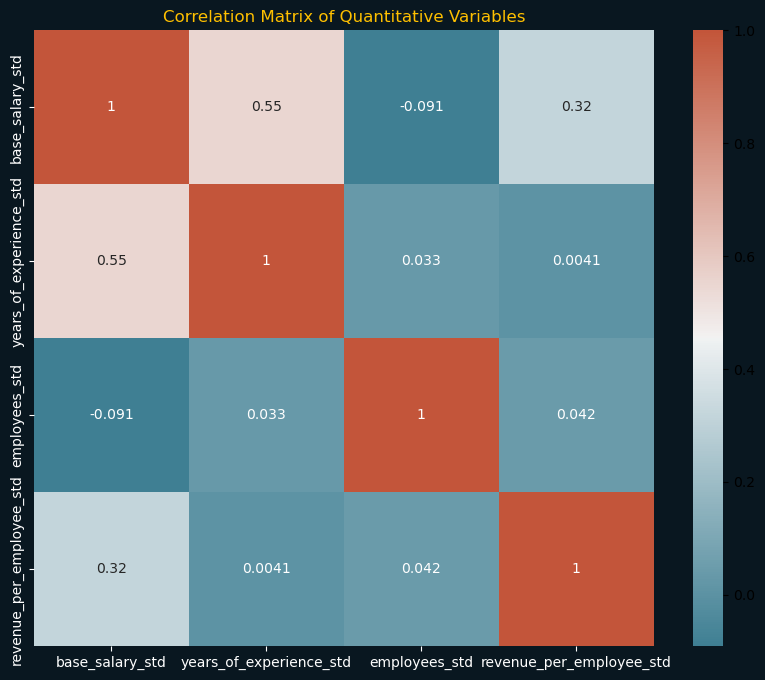

In [383]:
public_companies_cleaned = public_companies[['base_salary_std', 'years_of_experience_std',
                                             'employees_std', 'revenue_per_employee_std']]

corr_matrix = public_companies_cleaned.corr()

# Visualize correlation matrix)
plt.figure(figsize=(10, 8), facecolor='#091720')

sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.tick_params(colors='white')
plt.title('Correlation Matrix of Quantitative Variables', color='#FFC000')
plt.show()

plt.show()

![multiple](multiple.png) 

# Split Dataset

In [384]:
X = public_companies.drop(['base_salary_std', 'base_salary', 'years_of_experience', 'employees', 'revenue_per_employee'], axis=1)
X.head(3)

,years_of_experience_std,employees_std,revenue_per_employee_std,education_Highschool,education_Master's Degree,education_PhD,education_Some College,title_Data Scientist,title_Hardware Engineer,title_Human Resources,...,mc_group_Mega-Cap,mc_group_Mid-Cap,mc_group_Small-Cap,sector_Consumer Discretionary,sector_Consumer Staples,sector_Financials,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology
0,-0.382571,-0.307317,0.830102,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.707955,-0.236781,0.104547,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,-0.219880,-0.307317,0.830102,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [385]:
y = public_companies['base_salary_std']
y.head(3)

0    1.204493
1   -0.539148
2    0.535421
Name: base_salary_std, dtype: float64

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [387]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Multivariate Linear Regression Modeling

## Analyze Removal of Quantitative Variables

Our goal is to evaluate quantitative variables based on p-value.  Those with a p-value over .05 will be eliminated from the model.  This will be done one by one with the maximum p-value being removed on each iteration.

In [388]:
lm1 = sm.OLS(y_train, X_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        base_salary_std   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:42:16   Log-Likelihood:                -5923.8
No. Observations:                7625   AIC:                         1.192e+04
Df Residuals:                    7587   BIC:                         1.219e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [389]:
y_pred = lm1.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.27427149805800055
Linear Regression - MAE: 0.4008383573390516


# Analyze Removal of Categorical Variables

Here we will be test building a model without each of the categorical variables with replacement.  We expect the overall fit of the model to decrease with each variable removed, however those with little impact on the overall fit will be removed from the variables of interest to maximize the effect of the most significant variables.

## Test Removing Education

In [390]:
X_train1 = X_train.drop(columns=['education_Highschool', 'education_Some College', 'education_Master\'s Degree', 'education_PhD'], inplace=False)
X_test1 = X_test.drop(columns=['education_Highschool', 'education_Some College', 'education_Master\'s Degree', 'education_PhD'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        base_salary_std   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     236.4
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:42:41   Log-Likelihood:                -6086.9
No. Observations:                7625   AIC:                         1.224e+04
Df Residuals:                    7591   BIC:                         1.248e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.8721      0.054    -16.081      0.000      -0.978      -0.766
years_of_experience_std                0.4968      0.008     61.134      0.000       0.481       0.513
employees_std                         -0.7369      0.045    -16.249      0.000      -0.826      -0.648
revenue_per_employee_std               0.1937      0.012     16.668      0.000       0.171       0.216
title_Data Scientist                   0.7193      0.052     13.735      0.000       0.617       0.822
title_Hardware Engineer                0.4231      0.051      8.238      0.000       0.322       0.524
title_Human Resources                  0.1689      0.080      2.121      0.034       0.013       0.325
title_Management Consultant            0.3604      0.096      3.763      0.000       0.173       0.548
title_Marketing                        0.2671      0.061      4.378      0.000       0.147       0.387
title_Mechanical Engineer              0.3507      0.067      5.237      0.000       0.219       0.482
title_Product Designer                 0.5792      0.056     10.427      0.000       0.470       0.688
title_Product Manager                  0.6187      0.049     12.677      0.000       0.523       0.714
title_Recruiter                       -0.0466      0.080     -0.582      0.561      -0.203       0.110
title_Sales                           -0.0099      0.077     -0.128      0.898      -0.161       0.141
title_Software Engineer                0.5885      0.044     13.420      0.000       0.503       0.674
title_Software Engineering Manager     0.8867      0.054     16.285      0.000       0.780       0.993
title_Solution Architect               0.3757      0.070      5.385      0.000       0.239       0.512
title_Technical Program Manager        0.4464      0.056      8.024      0.000       0.337       0.555
race_Black                            -0.1889      0.033     -5.687      0.000      -0.254      -0.124
race_Hispanic                         -0.1325      0.028     -4.730      0.000      -0.187      -0.078
race_Two Or More                       0.0109      0.034      0.323      0.746      -0.055       0.077
race_White                            -0.0364      0.014     -2.608      0.009      -0.064      -0.009
sex_Male                               0.0603      0.016      3.791      0.000       0.029       0.091
sex_Other                             -0.0765      0.098     -0.778      0.437      -0.269       0.116
mc_group_Mega-Cap                      0.1709      0.018      9.295      0.000       0.135       0.207
mc_group_Mid-Cap                       0.0719      0.026      2.741      0.006       0.020       0.123
mc_group_Small-Cap                     0.0847      0.047      1.793      0.073      -0.008      

### Result
>Removing education decreased r^2 and adjusted r^2 by .016.

In [391]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.2857798283054113
Linear Regression - MAE: 0.40922069786954984


# Test Removing Sex

In [392]:
X_train1 = X_train.drop(columns=['sex_Other', 'sex_Male'], inplace=False)
X_test1 = X_test.drop(columns=['sex_Other', 'sex_Male'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        base_salary_std   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     241.3
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:42:51   Log-Likelihood:                -5930.2
No. Observations:                7625   AIC:                         1.193e+04
Df Residuals:                    7589   BIC:                         1.218e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9096      0.053    -17.326      0.000      -1.013      -0.807
years_of_experience_std                0.4924      0.008     61.499      0.000       0.477       0.508
employees_std                         -0.7387      0.044    -16.602      0.000      -0.826      -0.652
revenue_per_employee_std               0.1831      0.011     16.054      0.000       0.161       0.205
education_Highschool                   0.0271      0.057      0.478      0.633      -0.084       0.138
education_Master's Degree              0.1159      0.014      8.414      0.000       0.089       0.143
education_PhD                          0.5029      0.029     17.563      0.000       0.447       0.559
education_Some College                -0.0977      0.049     -1.988      0.047      -0.194      -0.001
title_Data Scientist                   0.5833      0.052     11.246      0.000       0.482       0.685
title_Hardware Engineer                0.3409      0.050      6.752      0.000       0.242       0.440
title_Human Resources                  0.1440      0.078      1.849      0.065      -0.009       0.297
title_Management Consultant            0.3440      0.094      3.666      0.000       0.160       0.528
title_Marketing                        0.2535      0.060      4.247      0.000       0.136       0.370
title_Mechanical Engineer              0.3143      0.066      4.789      0.000       0.186       0.443
title_Product Designer                 0.5625      0.054     10.348      0.000       0.456       0.669
title_Product Manager                  0.6083      0.048     12.717      0.000       0.515       0.702
title_Recruiter                       -0.0275      0.078     -0.351      0.725      -0.181       0.126
title_Sales                            0.0088      0.075      0.117      0.907      -0.139       0.157
title_Software Engineer                0.5831      0.043     13.587      0.000       0.499       0.667
title_Software Engineering Manager     0.8752      0.053     16.408      0.000       0.771       0.980
title_Solution Architect               0.3817      0.068      5.586      0.000       0.248       0.516
title_Technical Program Manager        0.4310      0.055      7.907      0.000       0.324       0.538
race_Black                            -0.1491      0.033     -4.556      0.000      -0.213      -0.085
race_Hispanic                         -0.0827      0.028     -2.972      0.003      -0.137      -0.028
race_Two Or More                       0.0420      0.033      1.270      0.204      -0.023       0.107
race_White                            -0.0006      0.014     -0.041      0.967      -0.029       0.028
mc_group_Mega-Cap                      0.1654      0.018      9.180      0.000       0.130      

### Result
>Removing sex decreased r^2 and adjusted r^2 by .001.  We can conlude based on this that sex is not a significant variable to the model.

In [393]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.27411141357833607
Linear Regression - MAE: 0.4007840690279636


# Test Removing Race

In [394]:
X_train1 = X_train.drop(columns=['race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
X_test1 = X_test.drop(columns=['race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        base_salary_std   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     254.6
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:42:56   Log-Likelihood:                -5940.6
No. Observations:                7625   AIC:                         1.195e+04
Df Residuals:                    7591   BIC:                         1.219e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9661      0.053    -18.343      0.000      -1.069      -0.863
years_of_experience_std                0.4911      0.008     61.430      0.000       0.475       0.507
employees_std                         -0.7599      0.044    -17.168      0.000      -0.847      -0.673
revenue_per_employee_std               0.1827      0.011     16.002      0.000       0.160       0.205
education_Highschool                   0.0247      0.057      0.434      0.664      -0.087       0.136
education_Master's Degree              0.1207      0.013      9.231      0.000       0.095       0.146
education_PhD                          0.5064      0.029     17.692      0.000       0.450       0.563
education_Some College                -0.1056      0.049     -2.151      0.031      -0.202      -0.009
title_Data Scientist                   0.5839      0.052     11.244      0.000       0.482       0.686
title_Hardware Engineer                0.3331      0.051      6.581      0.000       0.234       0.432
title_Human Resources                  0.1381      0.078      1.773      0.076      -0.015       0.291
title_Management Consultant            0.3356      0.094      3.574      0.000       0.152       0.520
title_Marketing                        0.2558      0.060      4.282      0.000       0.139       0.373
title_Mechanical Engineer              0.3099      0.066      4.714      0.000       0.181       0.439
title_Product Designer                 0.5708      0.055     10.463      0.000       0.464       0.678
title_Product Manager                  0.6118      0.048     12.777      0.000       0.518       0.706
title_Recruiter                       -0.0192      0.079     -0.244      0.807      -0.173       0.135
title_Sales                            0.0023      0.075      0.030      0.976      -0.146       0.150
title_Software Engineer                0.5776      0.043     13.424      0.000       0.493       0.662
title_Software Engineering Manager     0.8738      0.053     16.357      0.000       0.769       0.978
title_Solution Architect               0.3711      0.068      5.422      0.000       0.237       0.505
title_Technical Program Manager        0.4375      0.055      8.014      0.000       0.330       0.544
sex_Male                               0.0493      0.016      3.163      0.002       0.019       0.080
sex_Other                             -0.0738      0.096     -0.767      0.443      -0.263       0.115
mc_group_Mega-Cap                      0.1674      0.018      9.286      0.000       0.132       0.203
mc_group_Mid-Cap                       0.0832      0.026      3.234      0.001       0.033       0.134
mc_group_Small-Cap                     0.0955      0.046      2.063      0.039       0.005      

### Result
>Removing race decreased r^2 and adjusted r^2 by .003 indicating race is not a significant variable to the model.

In [395]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.274023619252157
Linear Regression - MAE: 0.4008022223488564


# Test Removing Sector

In [396]:
X_train1 = X_train.drop(columns=['sector_Consumer Discretionary',
                                 'sector_Consumer Staples', 'sector_Financials', 'sector_Healthcare', 
                                 'sector_Industrials', 'sector_Technology'], inplace=False)
X_test1 = X_test.drop(columns=['sector_Consumer Discretionary',
                                 'sector_Consumer Staples', 'sector_Financials', 'sector_Healthcare', 
                                 'sector_Industrials', 'sector_Technology'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        base_salary_std   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     246.9
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:43:00   Log-Likelihood:                -6124.2
No. Observations:                7625   AIC:                         1.231e+04
Df Residuals:                    7593   BIC:                         1.253e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.1978      0.052    -23.032      0.000      -1.300      -1.096
years_of_experience_std                0.4953      0.008     60.197      0.000       0.479       0.511
employees_std                         -0.7683      0.044    -17.427      0.000      -0.855      -0.682
revenue_per_employee_std               0.2367      0.011     21.910      0.000       0.215       0.258
education_Highschool                   0.0364      0.058      0.624      0.532      -0.078       0.151
education_Master's Degree              0.1260      0.014      8.939      0.000       0.098       0.154
education_PhD                          0.5334      0.029     18.194      0.000       0.476       0.591
education_Some College                -0.0742      0.050     -1.472      0.141      -0.173       0.025
title_Data Scientist                   0.6048      0.053     11.383      0.000       0.501       0.709
title_Hardware Engineer                0.3781      0.051      7.371      0.000       0.278       0.479
title_Human Resources                  0.2112      0.080      2.641      0.008       0.054       0.368
title_Management Consultant            0.3509      0.096      3.654      0.000       0.163       0.539
title_Marketing                        0.3375      0.061      5.522      0.000       0.218       0.457
title_Mechanical Engineer              0.2303      0.067      3.456      0.001       0.100       0.361
title_Product Designer                 0.6337      0.056     11.363      0.000       0.524       0.743
title_Product Manager                  0.6523      0.049     13.317      0.000       0.556       0.748
title_Recruiter                        0.0577      0.080      0.717      0.473      -0.100       0.215
title_Sales                            0.0967      0.077      1.252      0.210      -0.055       0.248
title_Software Engineer                0.6161      0.044     14.013      0.000       0.530       0.702
title_Software Engineering Manager     0.9003      0.055     16.467      0.000       0.793       1.007
title_Solution Architect               0.4328      0.070      6.189      0.000       0.296       0.570
title_Technical Program Manager        0.4782      0.056      8.569      0.000       0.369       0.588
race_Black                            -0.1653      0.034     -4.930      0.000      -0.231      -0.100
race_Hispanic                         -0.0895      0.029     -3.137      0.002      -0.145      -0.034
race_Two Or More                       0.0451      0.034      1.325      0.185      -0.022       0.112
race_White                            -0.0088      0.015     -0.595      0.552      -0.038       0.020
sex_Male                               0.0449      0.016      2.804      0.005       0.013      

### Result
>Removing sector decreased r^2 and adjusted r^2 by .021.

In [397]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.28907874503520214
Linear Regression - MAE: 0.41410423157989956


# Test Removing Market Cap Group

In [398]:
X_train1 = X_train.drop(columns=['mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap'], inplace=False)
X_test1 = X_test.drop(columns=['mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        base_salary_std   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     243.5
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:43:04   Log-Likelihood:                -5969.7
No. Observations:                7625   AIC:                         1.201e+04
Df Residuals:                    7590   BIC:                         1.225e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.7724      0.050    -15.565      0.000      -0.870      -0.675
years_of_experience_std                0.4902      0.008     60.563      0.000       0.474       0.506
employees_std                         -0.5730      0.037    -15.641      0.000      -0.645      -0.501
revenue_per_employee_std               0.2319      0.010     23.458      0.000       0.213       0.251
education_Highschool                   0.0229      0.057      0.400      0.689      -0.089       0.135
education_Master's Degree              0.1166      0.014      8.430      0.000       0.089       0.144
education_PhD                          0.5014      0.029     17.417      0.000       0.445       0.558
education_Some College                -0.0951      0.049     -1.924      0.054      -0.192       0.002
title_Data Scientist                   0.5737      0.052     11.004      0.000       0.471       0.676
title_Hardware Engineer                0.3033      0.051      5.977      0.000       0.204       0.403
title_Human Resources                  0.1538      0.078      1.960      0.050   -3.89e-06       0.308
title_Management Consultant            0.3467      0.094      3.676      0.000       0.162       0.532
title_Marketing                        0.2550      0.060      4.247      0.000       0.137       0.373
title_Mechanical Engineer              0.2969      0.066      4.498      0.000       0.168       0.426
title_Product Designer                 0.5751      0.055     10.507      0.000       0.468       0.682
title_Product Manager                  0.6116      0.048     12.724      0.000       0.517       0.706
title_Recruiter                       -0.0075      0.079     -0.095      0.925      -0.162       0.147
title_Sales                            0.0179      0.076      0.235      0.814      -0.131       0.167
title_Software Engineer                0.5766      0.043     13.357      0.000       0.492       0.661
title_Software Engineering Manager     0.8686      0.054     16.205      0.000       0.764       0.974
title_Solution Architect               0.3781      0.069      5.504      0.000       0.243       0.513
title_Technical Program Manager        0.4426      0.055      8.077      0.000       0.335       0.550
race_Black                            -0.1553      0.033     -4.725      0.000      -0.220      -0.091
race_Hispanic                         -0.0907      0.028     -3.239      0.001      -0.146      -0.036
race_Two Or More                       0.0382      0.033      1.144      0.253      -0.027       0.104
race_White                            -0.0049      0.015     -0.335      0.737      -0.033       0.024
sex_Male                               0.0495      0.016      3.154      0.002       0.019      

### Result
>Removing market cap group decreased r^2 by .002 and adjusted r^2 by .001 indicating market cap group is not significant to the model.

In [399]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.27581869747272436
Linear Regression - MAE: 0.40212524665348365


# Test Removing Title

In [400]:
X_train1 = X_train.drop(columns=['title_Data Scientist', 'title_Hardware Engineer', 'title_Human Resources', 
                                 'title_Management Consultant', 'title_Marketing', 'title_Mechanical Engineer', 'title_Product Designer',
                                 'title_Product Manager', 'title_Recruiter', 'title_Sales', 'title_Software Engineer', 
                                 'title_Software Engineering Manager', 'title_Solution Architect', 'title_Technical Program Manager'], inplace=False)
X_test1 = X_test.drop(columns=['title_Data Scientist', 'title_Hardware Engineer', 'title_Human Resources', 
                                 'title_Management Consultant', 'title_Marketing', 'title_Mechanical Engineer', 'title_Product Designer',
                                 'title_Product Manager', 'title_Recruiter', 'title_Sales', 'title_Software Engineer', 
                                 'title_Software Engineering Manager', 'title_Solution Architect', 'title_Technical Program Manager'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        base_salary_std   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     315.8
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:43:10   Log-Likelihood:                -6225.1
No. Observations:                7625   AIC:                         1.250e+04
Df Residuals:                    7601   BIC:                         1.266e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.4329      0.035    -12.441      0.000      -0.501      -0.365
years_of_experience_std           0.4855      0.008     62.746      0.000       0.470       0.501
employees_std                    -0.7392      0.046    -16.019      0.000      -0.830      -0.649
revenue_per_employee_std          0.1727      0.012     14.721      0.000       0.150       0.196
education_Highschool              0.0385      0.059      0.654      0.513      -0.077       0.154
education_Master's Degree         0.1170      0.014      8.267      0.000       0.089       0.145
education_PhD                     0.4986      0.029     17.393      0.000       0.442       0.555
education_Some College           -0.0784      0.051     -1.536      0.125      -0.178       0.022
race_Black                       -0.2027      0.034     -6.007      0.000      -0.269      -0.137
race_Hispanic                    -0.1076      0.029     -3.732      0.000      -0.164      -0.051
race_Two Or More                  0.0290      0.034      0.843      0.399      -0.038       0.096
race_White                       -0.0205      0.015     -1.379      0.168      -0.050       0.009
sex_Male                          0.0890      0.016      5.740      0.000       0.059       0.119
sex_Other                        -0.0403      0.100     -0.402      0.687      -0.237       0.156
mc_group_Mega-Cap                 0.1755      0.019      9.429      0.000       0.139       0.212
mc_group_Mid-Cap                  0.1182      0.027      4.437      0.000       0.066       0.170
mc_group_Small-Cap                0.1418      0.048      2.954      0.003       0.048       0.236
sector_Consumer Discretionary    -0.2348      0.029     -7.991      0.000      -0.292      -0.177
sector_Consumer Staples          -0.0908      0.085     -1.066      0.286      -0.258       0.076
sector_Financials                -0.3799      0.025    -15.057      0.000      -0.429      -0.330
sector_Healthcare                -0.3281      0.051     -6.440      0.000      -0.428      -0.228
sector_Industrials               -0.6129      0.037    -16.354      0.000      -0.686      -0.539
sector_Real Estate               -0.2727      0.117     -2.327      0.020      -0.502      -0.043
sector_Technology                -0.1495      0.017     -8.608      0.000      -0.184      -0.115
==============================================================================
Omnibus:                       68.554   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.781
Skew:                           0.082   Prob(JB):                     4.80e-23
Kurtosis:                       3.545   Cond. No.                         31.6
==========================================

### Result
>Removing title decreased r^2 by .042 and adjusted r^2 by .041.

In [401]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.2957649491725203
Linear Regression - MAE: 0.4185748111063105


# Test Removing Combinations of Categorical Variables

In [402]:
X_trainFinalLR = X_train.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
X_test1FinalLR = X_test.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], inplace=False)
lm = sm.OLS(y_train, X_train1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        base_salary_std   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     315.8
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:43:35   Log-Likelihood:                -6225.1
No. Observations:                7625   AIC:                         1.250e+04
Df Residuals:                    7601   BIC:                         1.266e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.4329      0.035    -12.441      0.000      -0.501      -0.365
years_of_experience_std           0.4855      0.008     62.746      0.000       0.470       0.501
employees_std                    -0.7392      0.046    -16.019      0.000      -0.830      -0.649
revenue_per_employee_std          0.1727      0.012     14.721      0.000       0.150       0.196
education_Highschool              0.0385      0.059      0.654      0.513      -0.077       0.154
education_Master's Degree         0.1170      0.014      8.267      0.000       0.089       0.145
education_PhD                     0.4986      0.029     17.393      0.000       0.442       0.555
education_Some College           -0.0784      0.051     -1.536      0.125      -0.178       0.022
race_Black                       -0.2027      0.034     -6.007      0.000      -0.269      -0.137
race_Hispanic                    -0.1076      0.029     -3.732      0.000      -0.164      -0.051
race_Two Or More                  0.0290      0.034      0.843      0.399      -0.038       0.096
race_White                       -0.0205      0.015     -1.379      0.168      -0.050       0.009
sex_Male                          0.0890      0.016      5.740      0.000       0.059       0.119
sex_Other                        -0.0403      0.100     -0.402      0.687      -0.237       0.156
mc_group_Mega-Cap                 0.1755      0.019      9.429      0.000       0.139       0.212
mc_group_Mid-Cap                  0.1182      0.027      4.437      0.000       0.066       0.170
mc_group_Small-Cap                0.1418      0.048      2.954      0.003       0.048       0.236
sector_Consumer Discretionary    -0.2348      0.029     -7.991      0.000      -0.292      -0.177
sector_Consumer Staples          -0.0908      0.085     -1.066      0.286      -0.258       0.076
sector_Financials                -0.3799      0.025    -15.057      0.000      -0.429      -0.330
sector_Healthcare                -0.3281      0.051     -6.440      0.000      -0.428      -0.228
sector_Industrials               -0.6129      0.037    -16.354      0.000      -0.686      -0.539
sector_Real Estate               -0.2727      0.117     -2.327      0.020      -0.502      -0.043
sector_Technology                -0.1495      0.017     -8.608      0.000      -0.184      -0.115
==============================================================================
Omnibus:                       68.554   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.781
Skew:                           0.082   Prob(JB):                     4.80e-23
Kurtosis:                       3.545   Cond. No.                         31.6
==========================================

### Result
>Removing sex, market cap group, and race decreased r^2 and adjusted r^2 by .006 indicating these variables are not significant to the model.

In [170]:
y_pred = lm.predict(X_test1)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Linear Regression - MSE: 0.2757696805980922
Linear Regression - MAE: 0.4021463583227699


# Model with Original Dataset Variables Exclusively

> Here we want to analyze the difference between models calculated with the stock dataset and without to compare overall fit.

In [172]:
X_train2 = X_train.drop(columns=['employees_std','revenue_per_employee_std', 
                                 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'sector_Consumer Discretionary', 'sector_Consumer Staples',
                                 'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
                                 'sector_Real Estate', 'sector_Technology'], inplace=False)
                                 
       
X_test2 = X_test.drop(columns=['employees_std','revenue_per_employee_std', 
                                 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                                 'sector_Consumer Discretionary', 'sector_Consumer Staples',
                                 'sector_Financials', 'sector_Healthcare', 'sector_Industrials',
                                 'sector_Real Estate', 'sector_Technology'], inplace=False)
                               
lm1 = sm.OLS(y_train, X_train2)
lm1 = lm1.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        base_salary_std   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     197.3
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:26:37   Log-Likelihood:                -6874.6
No. Observations:                7625   AIC:                         1.380e+04
Df Residuals:                    7599   BIC:                         1.398e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.7759      0.050    -15.437      0.000      -0.874      -0.677
years_of_experience_std                0.4967      0.009     54.787      0.000       0.479       0.514
education_Highschool                   0.0692      0.064      1.076      0.282      -0.057       0.195
education_Master's Degree              0.1534      0.016      9.888      0.000       0.123       0.184
education_PhD                          0.6473      0.032     20.160      0.000       0.584       0.710
education_Some College                -0.0349      0.056     -0.629      0.529      -0.144       0.074
title_Data Scientist                   0.6494      0.059     11.096      0.000       0.535       0.764
title_Hardware Engineer                0.4452      0.056      7.890      0.000       0.335       0.556
title_Human Resources                  0.3246      0.088      3.684      0.000       0.152       0.497
title_Management Consultant            0.2518      0.106      2.379      0.017       0.044       0.459
title_Marketing                        0.4387      0.067      6.520      0.000       0.307       0.571
title_Mechanical Engineer              0.2576      0.073      3.512      0.000       0.114       0.401
title_Product Designer                 0.7361      0.061     11.996      0.000       0.616       0.856
title_Product Manager                  0.7071      0.054     13.111      0.000       0.601       0.813
title_Recruiter                        0.2688      0.089      3.038      0.002       0.095       0.442
title_Sales                            0.1307      0.085      1.536      0.125      -0.036       0.298
title_Software Engineer                0.6821      0.048     14.096      0.000       0.587       0.777
title_Software Engineering Manager     0.9363      0.060     15.552      0.000       0.818       1.054
title_Solution Architect               0.4588      0.077      5.953      0.000       0.308       0.610
title_Technical Program Manager        0.6016      0.061      9.809      0.000       0.481       0.722
race_Black                            -0.2380      0.037     -6.467      0.000      -0.310      -0.166
race_Hispanic                         -0.1211      0.031     -3.855      0.000      -0.183      -0.060
race_Two Or More                       0.0367      0.038      0.978      0.328      -0.037       0.110
race_White                            -0.0463      0.016     -2.855      0.004      -0.078      -0.015
sex_Male                               0.0435      0.018      2.464      0.014       0.009       0.078
sex_Other                             -0.0433      0.109     -0.397      0.691      -0.257       0.171
==============================================================================
Omnibus:         

In [173]:
y_pred2 = lm1.predict(X_test2)
lr_mse2 = mean_squared_error(y_test, y_pred2)
lr_mae2 = mean_absolute_error(y_test, y_pred2)
print("Linear Regression - MSE:", lr_mse2)
print("Linear Regression - MAE:", lr_mae2)

Linear Regression - MSE: 0.3605773039285299
Linear Regression - MAE: 0.47202487155490797


In [404]:
X = X.drop(columns=['sex_Other', 'sex_Male', 'mc_group_Mega-Cap', 'mc_group_Mid-Cap', 'mc_group_Small-Cap',
                    'race_White', 'race_Two Or More', 'race_Hispanic', 'race_Black'], axis=1)
X.sample(3)

,years_of_experience_std,employees_std,revenue_per_employee_std,education_Highschool,education_Master's Degree,education_PhD,education_Some College,title_Data Scientist,title_Hardware Engineer,title_Human Resources,...,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager,sector_Consumer Discretionary,sector_Consumer Staples,sector_Financials,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology
331,-1.196031,-0.346368,1.616050,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
16527,-0.707955,-0.566165,0.434145,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3107,1.244347,-0.227649,-0.630581,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Testing Assumptions

# Linearity

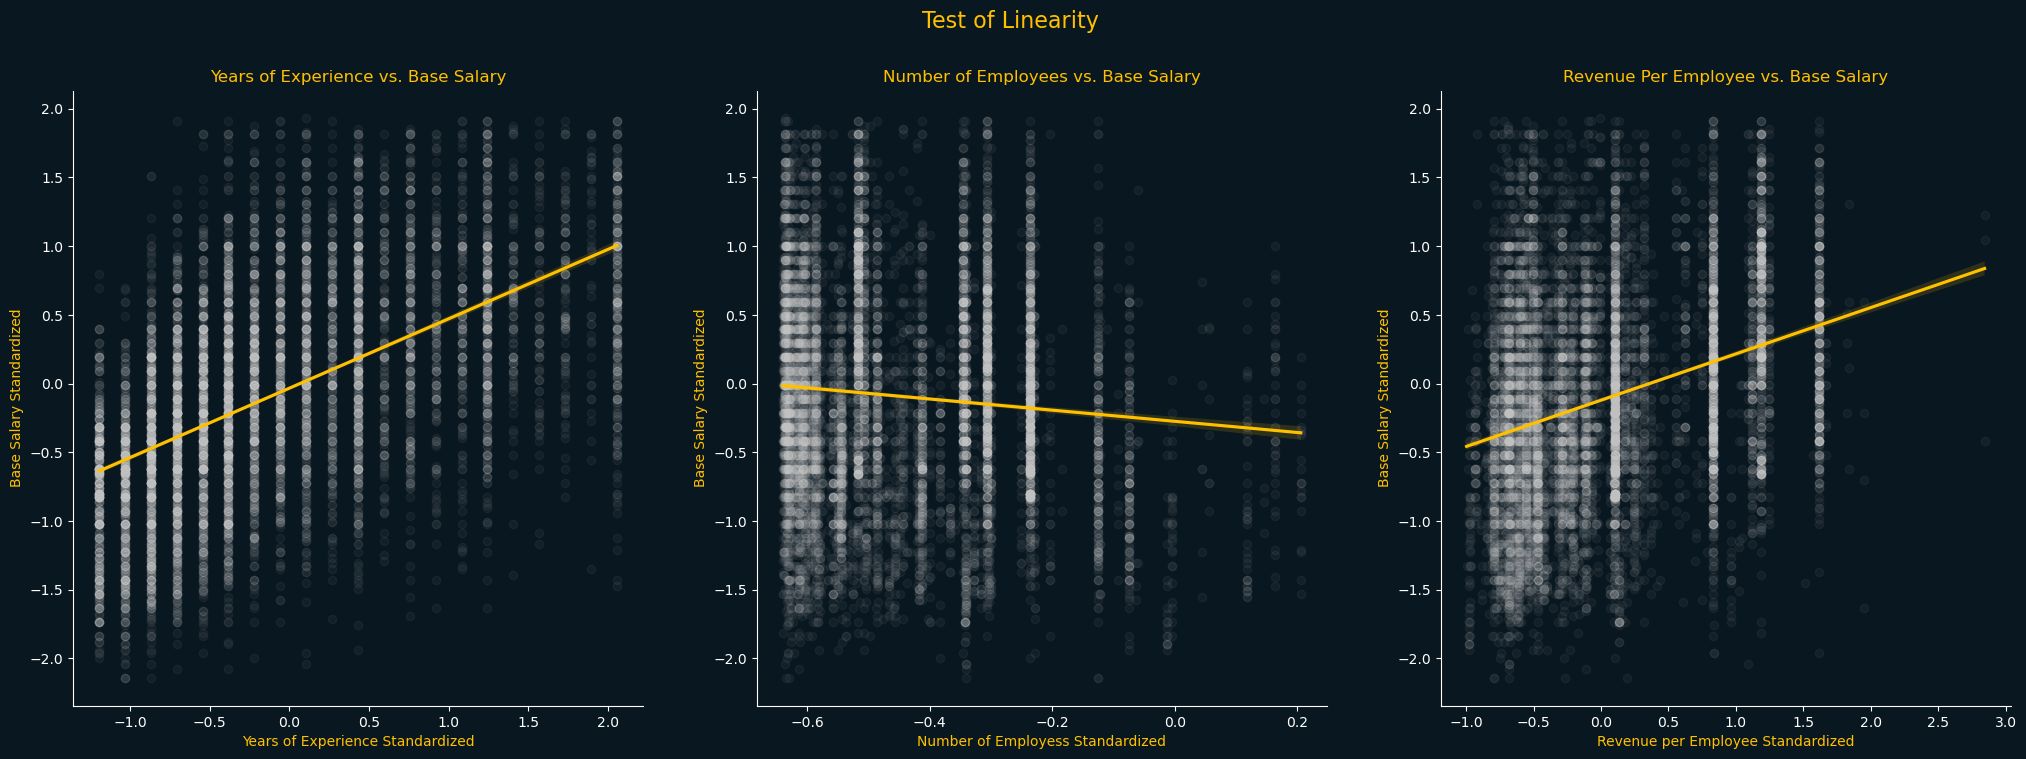

In [501]:
fig, ax = plt.subplots(ncols=3)
fig.set_figheight(8)
fig.set_figwidth(25)
fig.patch.set_facecolor('#091720')
fig.suptitle('Test of Linearity', color='#FFC000', fontsize=16)

# Years of Experience
sns.regplot(x=X['years_of_experience_std'], y=y, line_kws={'color': '#FFC000'}, scatter_kws={'color': 'lightgrey', 'alpha': 0.05}, ax=ax[0])
ax[0].set_title('Years of Experience vs. Base Salary', color='#FFC000')
ax[0].set_xlabel('Years of Experience Standardized', color='#FFC000')
ax[0].set_ylabel('Base Salary Standardized', color='#FFC000')
ax[0].tick_params(axis='y', colors='white')
ax[0].tick_params(axis='x', colors='white')

ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('#091720') 
ax[0].spines['right'].set_color('#091720')
ax[0].spines['left'].set_color('white')
ax[0].set_facecolor('#091720')

# Number of Employees
sns.regplot(x=X['employees_std'], y=y, line_kws={'color': '#FFC000'}, scatter_kws={'color': 'lightgrey', 'alpha': 0.05}, ax=ax[1])
ax[1].set_title('Number of Employees vs. Base Salary', color='#FFC000')
ax[1].set_xlabel('Number of Employess Standardized', color='#FFC000')
ax[1].set_ylabel('Base Salary Standardized', color='#FFC000')
ax[1].tick_params(axis='y', colors='white')
ax[1].tick_params(axis='x', colors='white')

ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('#091720') 
ax[1].spines['right'].set_color('#091720')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('#091720')

# Revenue per Employee
sns.regplot(x=X['revenue_per_employee_std'], y=y, line_kws={'color': '#FFC000'}, scatter_kws={'color': 'lightgrey', 'alpha': 0.05}, ax=ax[2])
ax[2].set_title('Revenue Per Employee vs. Base Salary', color='#FFC000')
ax[2].set_xlabel('Revenue per Employee Standardized', color='#FFC000')
ax[2].set_ylabel('Base Salary Standardized', color='#FFC000')
ax[2].tick_params(axis='y', colors='white')
ax[2].tick_params(axis='x', colors='white')

ax[2].spines['bottom'].set_color('white')
ax[2].spines['top'].set_color('#091720') 
ax[2].spines['right'].set_color('#091720')
ax[2].spines['left'].set_color('white')
ax[2].set_facecolor('#091720')
plt.show()


# Collinearity

In [424]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF scores for all the predictors
VIFs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for i, vif in enumerate(VIFs):
    print(f"VIF for {X.columns[i]}: {vif}")

VIF for years_of_experience_std: 1.2224624039763092
VIF for employees_std: 7.205330803572012
VIF for revenue_per_employee_std: 1.3569674487851937
VIF for education_Highschool: 1.029709270606901
VIF for education_Master's Degree: 1.984114026667166
VIF for education_PhD: 1.2192034826542675
VIF for education_Some College: 1.04154153830522
VIF for title_Data Scientist: 1.5389252836399379
VIF for title_Hardware Engineer: 1.7688807288378452
VIF for title_Human Resources: 1.0785500268037773
VIF for title_Management Consultant: 1.0517438002867079
VIF for title_Marketing: 1.2046216232667741
VIF for title_Mechanical Engineer: 1.20472046092119
VIF for title_Product Designer: 1.3047932650110852
VIF for title_Product Manager: 1.7245219864419608
VIF for title_Recruiter: 1.0864777733413373
VIF for title_Sales: 1.078084913804187
VIF for title_Software Engineer: 7.400000557957562
VIF for title_Software Engineering Manager: 1.4318048555116785
VIF for title_Solution Architect: 1.1352898379348995
VIF for 

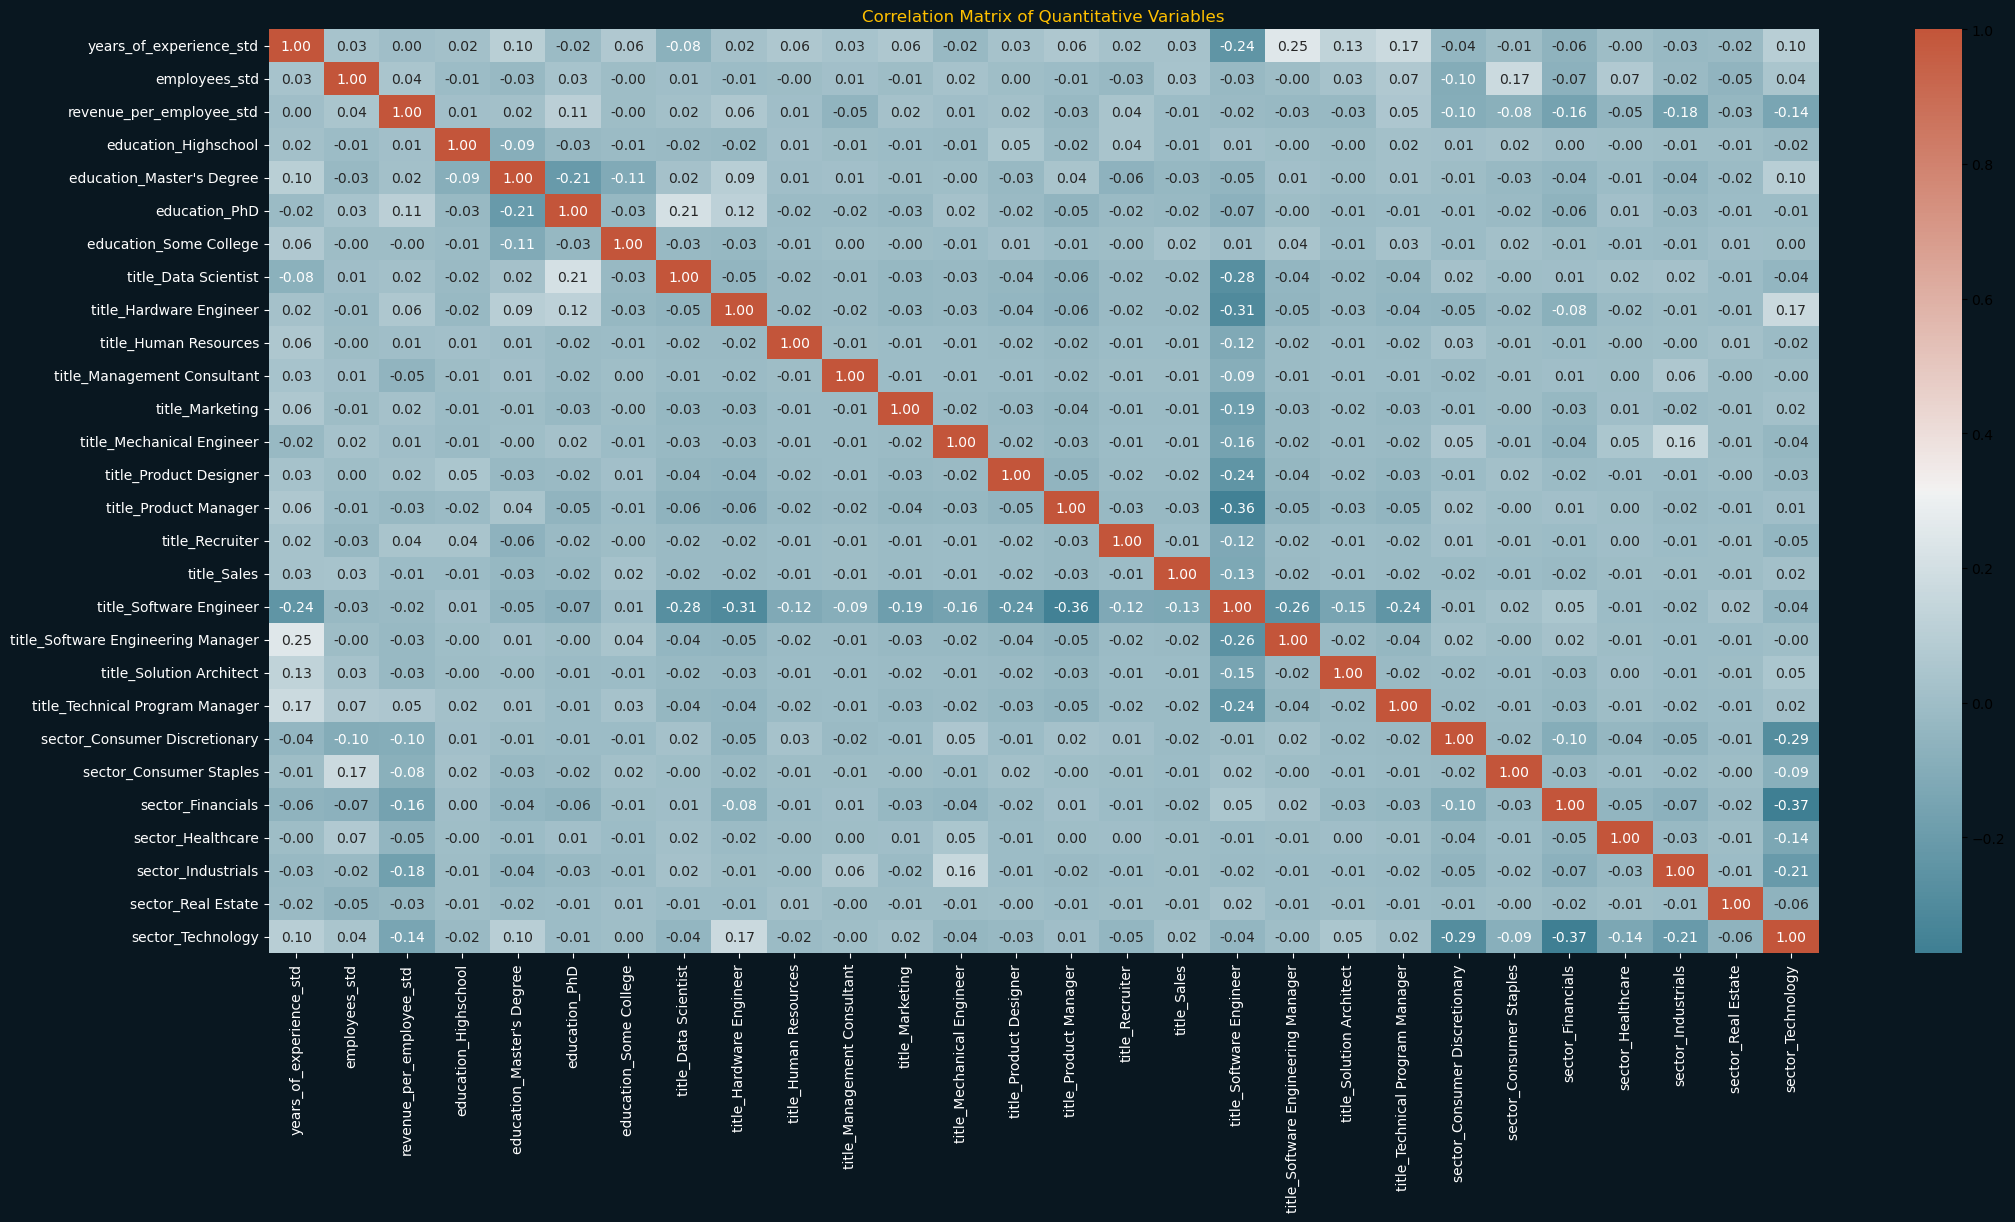

In [476]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Visualize correlation matrix)
plt.figure(figsize=(25, 12), facecolor='#091720')

sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), fmt=".2f")

plt.tick_params(colors='white')
plt.title('Correlation Matrix of Quantitative Variables', color='#FFC000')
plt.show()

plt.show()

# Normality of Residuals

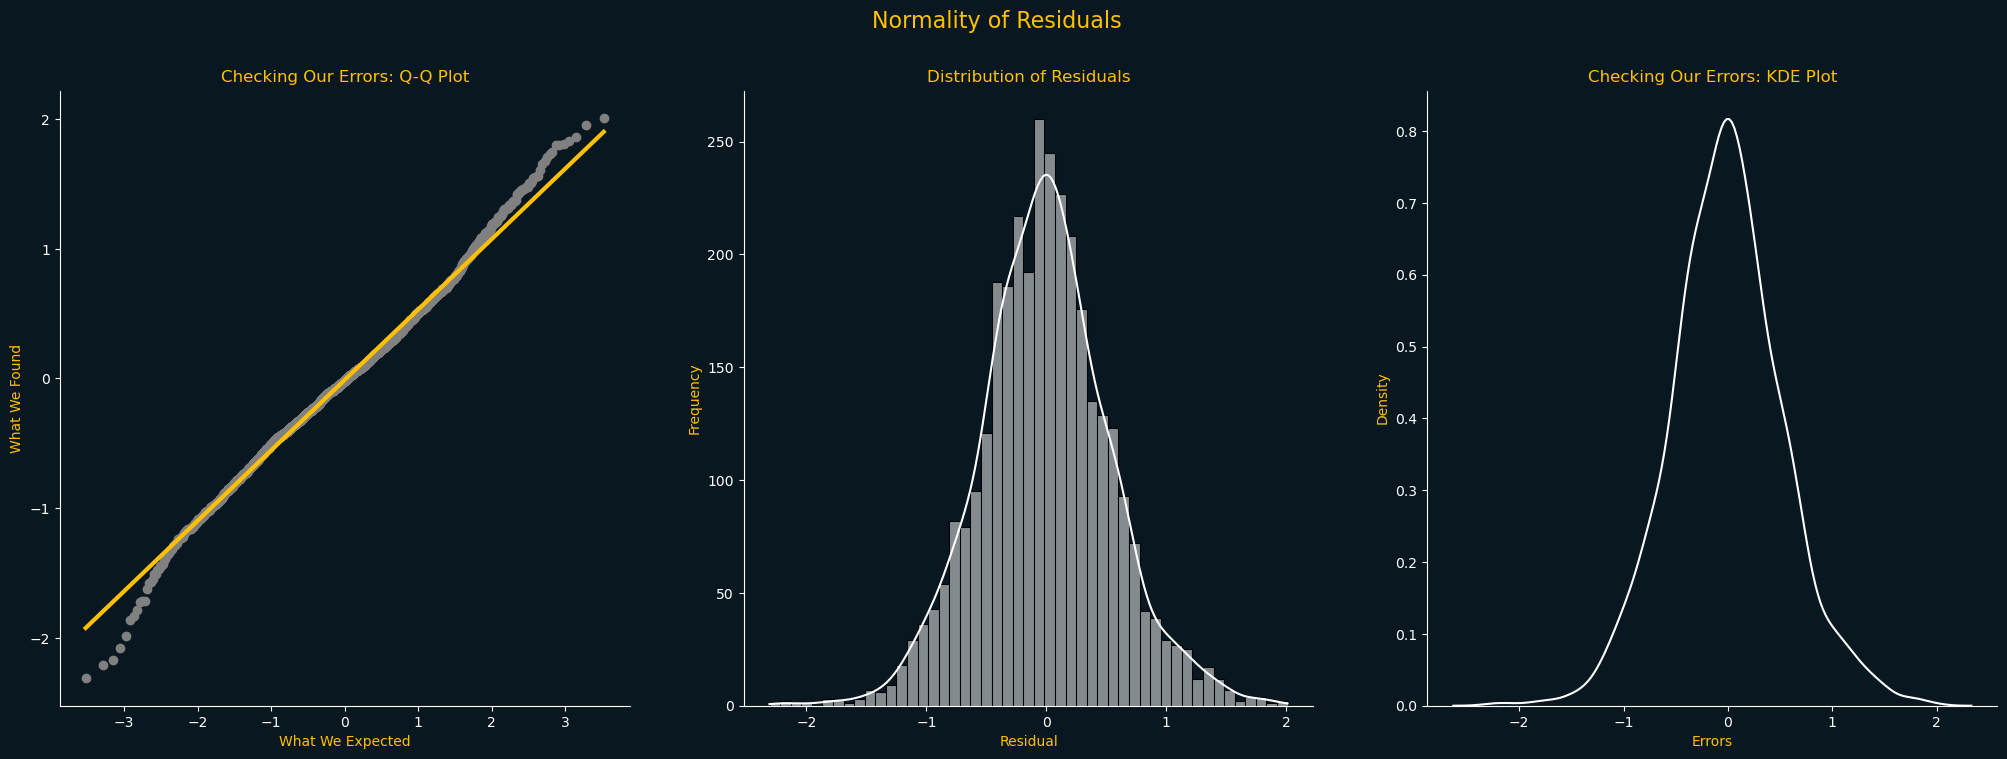

In [455]:
import scipy.stats as stats

residuals = y_test - y_pred

fig, ax = plt.subplots(ncols=3)
fig.set_figheight(8)
fig.set_figwidth(25)
fig.patch.set_facecolor('#091720')
fig.suptitle('Normality of Residuals', color='#FFC000', fontsize=16)

#Q-Q Plot
stats.probplot(residuals, dist="norm", plot=ax[0])
ax[0].set_title('Checking Our Errors: Q-Q Plot', color='#FFC000')
ax[0].set_xlabel('What We Expected', color='#FFC000')
ax[0].set_ylabel('What We Found', color='#FFC000')
ax[0].tick_params(axis='y', colors='white')
ax[0].tick_params(axis='x', colors='white')

ax[0].get_lines()[0].set_color('grey')
ax[0].get_lines()[1].set_color('#FFC000')
ax[0].get_lines()[1].set_linewidth(3)

ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('#091720') 
ax[0].spines['right'].set_color('#091720')
ax[0].spines['left'].set_color('white')
ax[0].set_facecolor('#091720')

# distribution of residuals
sns.histplot(residuals, kde=True, ax=ax[1], color='white')
ax[1].set_title('Distribution of Residuals', color='#FFC000')
ax[1].set_xlabel('Residual', color='#FFC000')
ax[1].set_ylabel('Frequency', color='#FFC000')
ax[1].tick_params(axis='y', colors='white')
ax[1].tick_params(axis='x', colors='white')

ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('#091720') 
ax[1].spines['right'].set_color('#091720')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('#091720')

# KDE Plot
sns.kdeplot(residuals, ax=ax[2], color='white')
ax[2].set_title('Checking Our Errors: KDE Plot', color='#FFC000')
ax[2].set_xlabel('Errors', color='#FFC000')
ax[2].set_ylabel('Density', color='#FFC000')
ax[2].tick_params(axis='y', colors='white')
ax[2].tick_params(axis='x', colors='white')

ax[2].spines['bottom'].set_color('white')
ax[2].spines['top'].set_color('#091720') 
ax[2].spines['right'].set_color('#091720')
ax[2].spines['left'].set_color('white')
ax[2].set_facecolor('#091720')

plt.show()

# Homoscedasticity

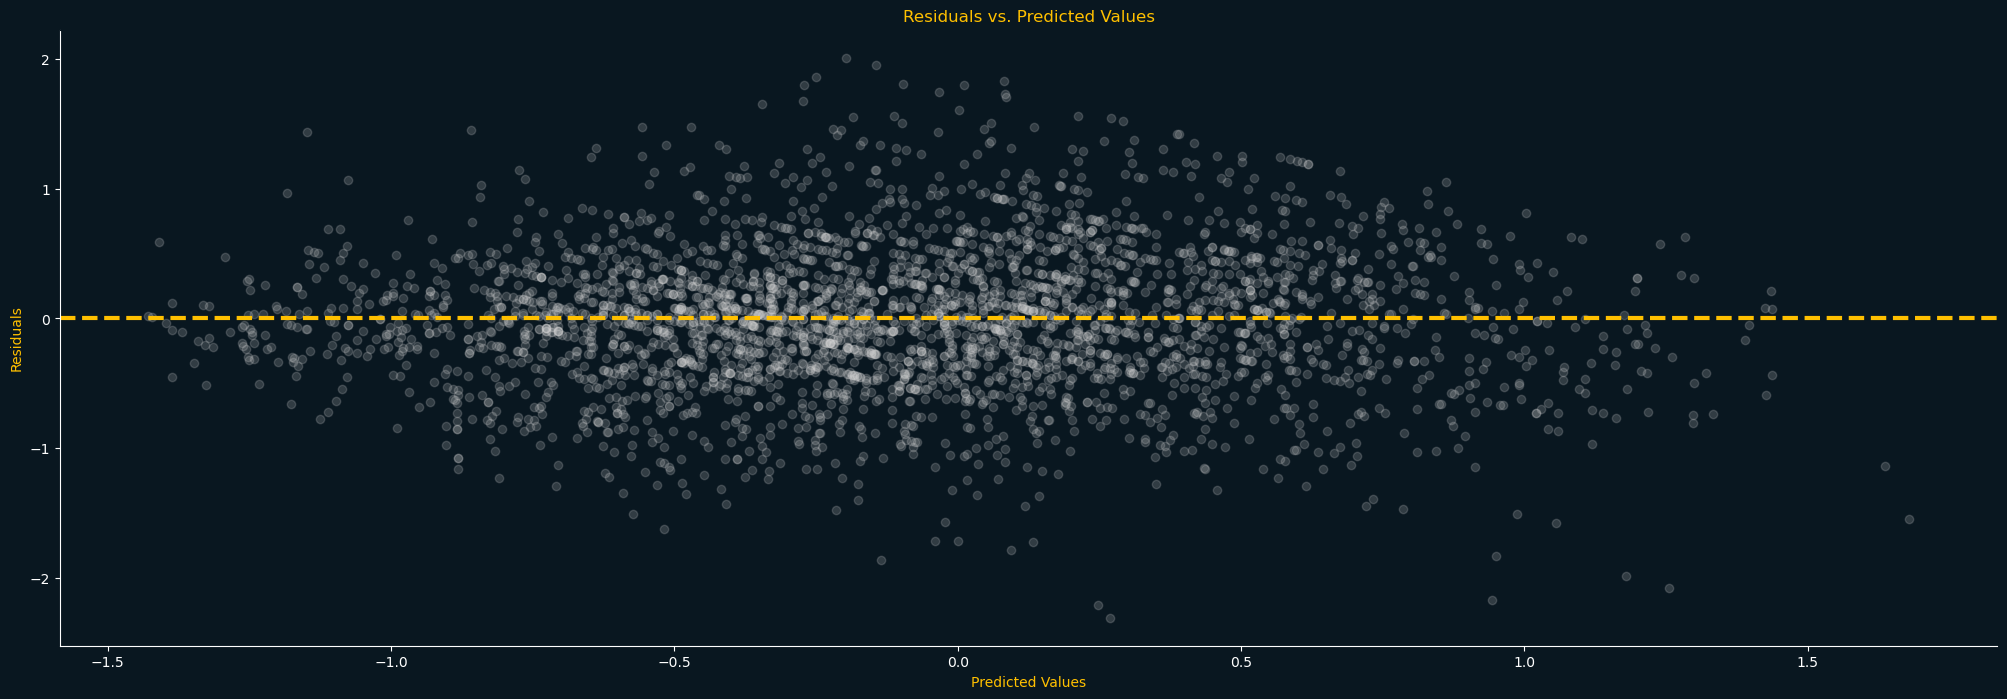

In [502]:
#Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(25, 8))
plt.scatter(y_pred, residuals, alpha=0.2, color='lightgrey')
plt.axhline(y=0, color='#FFC000', linestyle='--', linewidth=3)
plt.xlabel('Predicted Values', color='#FFC000')
plt.ylabel('Residuals', color='#FFC000')
plt.tick_params(axis='y', colors='white')
plt.tick_params(axis='x', colors='white')
plt.title('Residuals vs. Predicted Values', color='#FFC000')

plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('#091720') 
plt.gca().spines['right'].set_color('#091720')
plt.gca().spines['left'].set_color('white')
plt.gca().set_facecolor('#091720')
plt.gcf().set_facecolor('#091720')

plt.show()

# Independence

In [422]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_stat = durbin_watson(lm1.resid)
print(f"Durbin-Watson statistic: {durbin_watson_stat}")

Durbin-Watson statistic: 1.990561712971742


# Decision Tree Modeling & Comparison

In [174]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train1, y_train)
dt_predictions = dt_model.predict(X_test1)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

In [177]:
#unstandardizing the data
mean = public_companies['base_salary'].mean()
std = public_companies['base_salary'].std()

unstandardized_predictions = (y_pred * std) + mean
unstandardized_test        = (y_test * std) + mean
unstandardized_dt_predictions = (dt_predictions * std) + mean

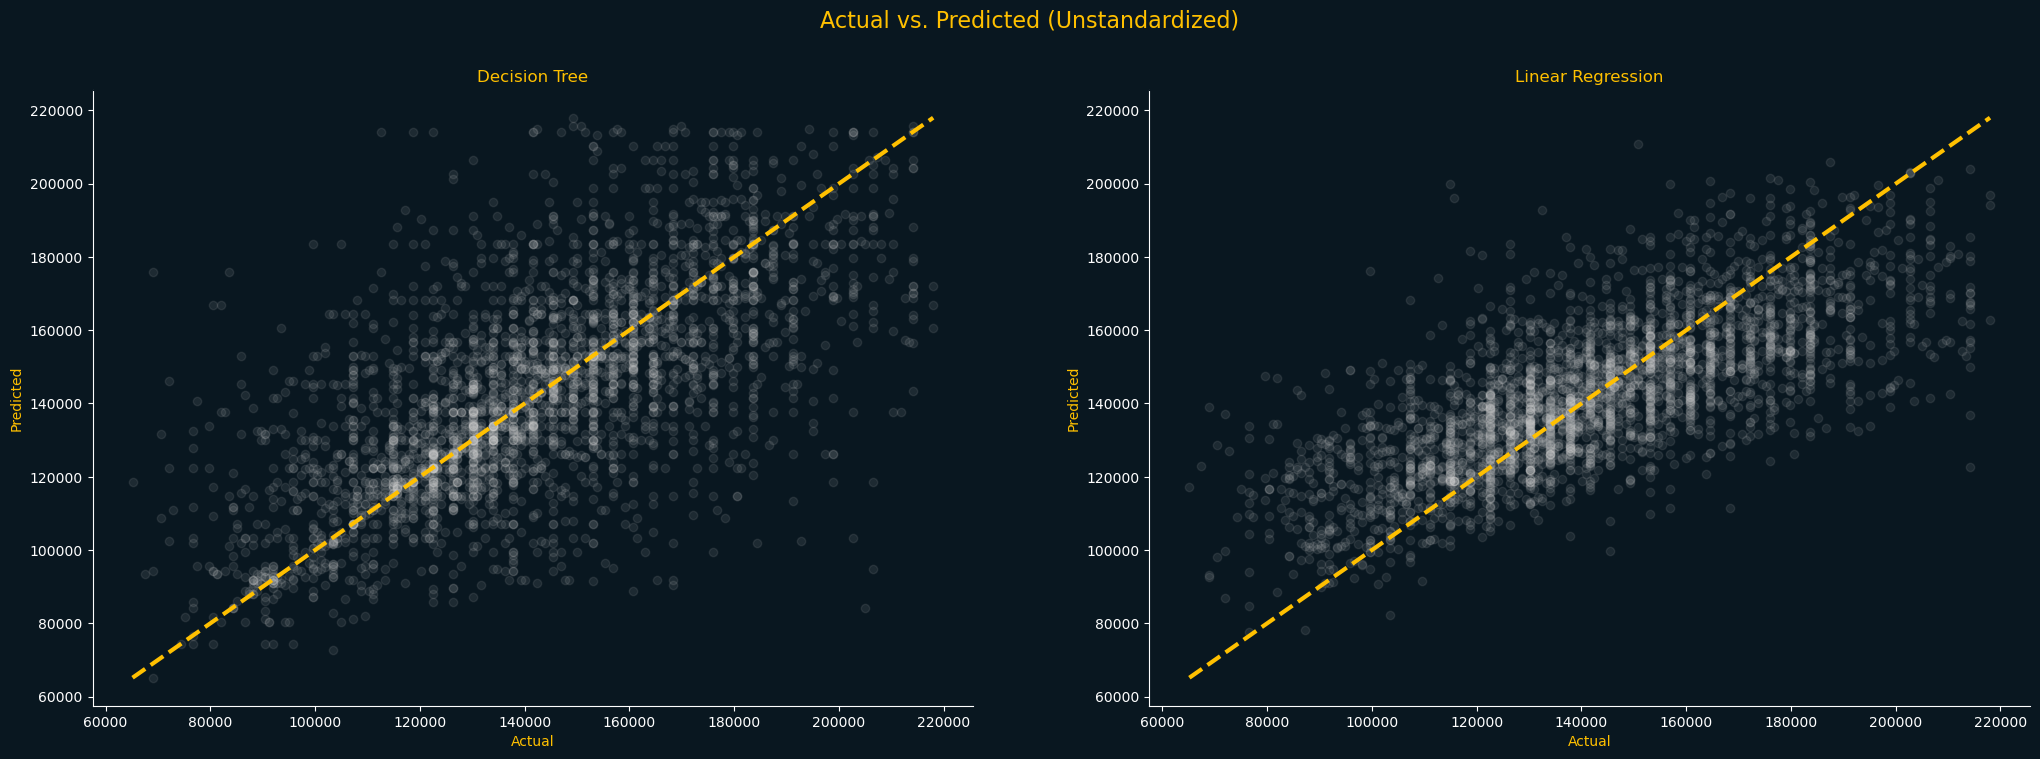

In [503]:
# plot actual vs. predicted of both models
fig, ax = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)
fig.patch.set_facecolor('#091720')
fig.suptitle('Actual vs. Predicted (Unstandardized)', color='#FFC000', fontsize=16)

plt.sca(ax[0])
plt.scatter(unstandardized_test, unstandardized_dt_predictions, color='lightgrey', label='Decision Tree', alpha=.1)
plt.plot([min(unstandardized_test), max(unstandardized_test)], [min(unstandardized_test), max(unstandardized_test)], color='#FFC000', linestyle='--', linewidth=3)
plt.title('Decision Tree', color='#FFC000')
plt.xlabel('Actual', color='#FFC000')
plt.ylabel('Predicted', color='#FFC000')
ax[0].tick_params(axis='y', colors='white')
ax[0].tick_params(axis='x', colors='white')


ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('#091720') 
ax[0].spines['right'].set_color('#091720')
ax[0].spines['left'].set_color('white')
ax[0].set_facecolor('#091720')

plt.sca(ax[1])
plt.scatter(unstandardized_test, unstandardized_predictions, color='lightgrey', label='Linear Regression', alpha=.1)
plt.plot([min(unstandardized_test), max(unstandardized_test)], [min(unstandardized_test), max(unstandardized_test)], color='#FFC000', linestyle='--', linewidth=3)
plt.title('Linear Regression', color='#FFC000')
plt.xlabel('Actual', color='#FFC000')
plt.ylabel('Predicted', color='#FFC000')
ax[1].tick_params(axis='y', colors='white')
ax[1].tick_params(axis='x', colors='white')

ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('#091720') 
ax[1].spines['right'].set_color('#091720')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('#091720')

plt.show()

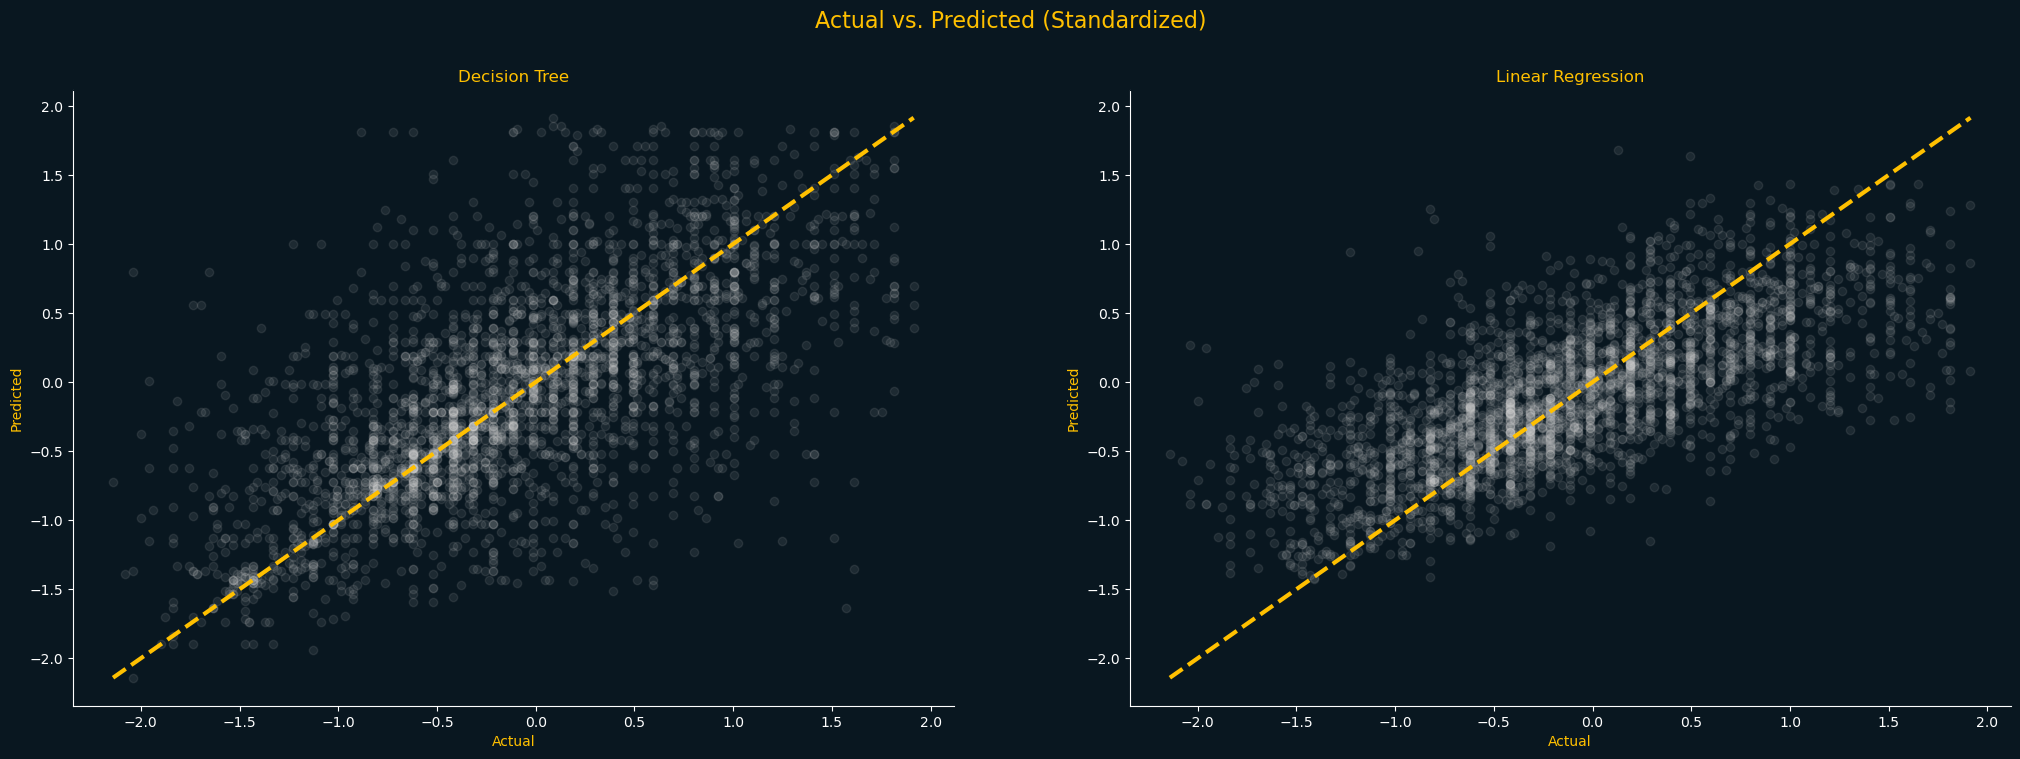

In [504]:
# plot actual vs. predicted of both models
fig, ax = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)
fig.patch.set_facecolor('#091720')
fig.suptitle('Actual vs. Predicted (Standardized)', color='#FFC000', fontsize=16)

plt.sca(ax[0])
plt.scatter(y_test, dt_predictions, color='lightgrey', label='Decision Tree', alpha=.1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#FFC000', linestyle='--', linewidth=3)
plt.title('Decision Tree', color='#FFC000')
plt.xlabel('Actual', color='#FFC000')
plt.ylabel('Predicted', color='#FFC000')
ax[0].tick_params(axis='y', colors='white')
ax[0].tick_params(axis='x', colors='white')


ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('#091720') 
ax[0].spines['right'].set_color('#091720')
ax[0].spines['left'].set_color('white')
ax[0].set_facecolor('#091720')

plt.sca(ax[1])
plt.scatter(y_test, y_pred, color='lightgray', label='Linear Regression', alpha=.1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#FFC000', linestyle='--', linewidth=3)
plt.title('Linear Regression', color='#FFC000')
plt.xlabel('Actual', color='#FFC000')
plt.ylabel('Predicted', color='#FFC000')
ax[1].tick_params(axis='y', colors='white')
ax[1].tick_params(axis='x', colors='white')

ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('#091720') 
ax[1].spines['right'].set_color('#091720')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('#091720')

plt.show()

In [340]:
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - MAE:", lr_mae)

Decision Tree - MSE:  0.39186926548037504
Decision Tree - MAE:  0.4522118443747291
Linear Regression - MSE: 0.2757696805980922
Linear Regression - MAE: 0.4021463583227699
